<a href="https://colab.research.google.com/github/DavidSenseman/BIO1173/blob/main/Class_02_2_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO 1173: Intro Computational Biology**

##### **Module 2: Neural Networks with PyTorch**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Biology, Health and the Environment](https://sciences.utsa.edu/bhe/), [UTSA](https://www.utsa.edu/)

### Module 2 Material

* Part 2.1: Introduction to Neural Networks with PyTorch
* **Part 2.2: Encoding Feature Vectors**
* Part 2.3: Controlling Overfitting
* Part 2.4: Saving and Loading a PyTorch Neural Network

## Google CoLab Instructions

You MUST run the following code cell to get credit for this class lesson. By running this code cell, you will map your GDrive to /content/drive and print out your Google GMAIL address. Your Instructor will use your GMAIL address to verify the author of this class lesson.

In [1]:
# You must run this cell first
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    Colab = True
    print("Note: Using Google CoLab")
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("**WARNING**: Your GMAIL address was **not** printed in the output below.")
    print("**WARNING**: You will NOT receive credit for this lesson.")
    Colab = False

Mounted at /content/drive
Note: Using Google CoLab
david.senseman@gmail.com


You should see the following output except your GMAIL address should appear on the last line.

![___](https://biologicslab.co/BIO1173/images/class_02/class_02_1_image01A.png)

If your GMAIL address does not appear your lesson will **not** be graded.

### Create Custom Function

The cell below creates a custom function called `hms_string()`. This function is needed to record the time required to train your neural network model.

If you fail to run this cell now, you will receive one (or more) error message(s) later in this lesson.

## Install ID and Keys

###### **Install your BIO1173_API_KEY now!**
You will need to have your `BIO1173_API_KEY` installed correctly in your Colab Secrets _before_ you run this cell. Your `BIO1173_API_KEY` was mailed to you at the GMAIL address that you are using right now in Colab. If you need help, feel free to ask your Instructor and/or TA for help...that is what they are there for.

Run the next cell to access the Colab Secrets for this lesson.

In [2]:
# Install Keys
from google.colab import userdata
import os

# myUTSA IF
try:
    # 1. Get the key from Secrets
    UTSA_ID = userdata.get('myUTSA_ID')

    # 2. Set it as an environment variable
    os.environ['UTSA_ID'] = UTSA_ID

    print("UTSA_ID loaded and environment variable set successfully!")
    print(f"UTSA_ID:{UTSA_ID}")

except Exception as e:
    print(f"Error loading UTSA_ID: {e}")
    print("Please set your UTSA_ID in Google Colab:")
    print("1. Go to Secrets in the left sidebar (key icon)")
    print("2. Create a new secret named 'myUTSA_ID'")
    print("3. Enter your myUTSA ID ('abc123') and toggle 'Notebook access' on")

# BIO1173_API_KEY
try:
    # 1. Get the key from Secrets
    BIO1173_API_KEY = userdata.get('BIO1173_API_KEY')

    # 2. Set it as an environment variable
    os.environ['BIO1173_API_KEY'] = BIO1173_API_KEY

    print("BIO1173_API_KEY loaded and environment variable set successfully!")
    print(f"UTSA_ID:{BIO1173_API_KEY}")

except Exception as e:
    print(f"Error loading UTSA_ID: {e}")
    print("Please set your UTSA_ID in Google Colab:")
    print("1. Go to Secrets in the left sidebar (key icon)")
    print("2. Create a new secret named 'myUTSA_ID'")
    print("3. Enter your myUTSA ID ('abc123') and toggle 'Notebook access' on")


UTSA_ID loaded and environment variable set successfully!
UTSA_ID:gie856
BIO1173_API_KEY loaded and environment variable set successfully!
UTSA_ID: BIO1173-7A3F-9E2D-8B1C-5F4A


If your both your myUTSA id and your BIO1173_API_KEY are correctly stored in your Colab Secrets, you should see something _similar_ to the following output:

```text
UTSA_ID loaded and environment variable set successfully!
UTSA_ID:gie856
BIO1173_API_KEY loaded and environment variable set successfully!
UTSA_ID: BIO1173-7A3F-9E2D-8B1C-5F4A
```

However, if you see something like:
```text
UTSA_ID loaded and environment variable set successfully!
UTSA_ID:gie856
Error loading UTSA_ID: Notebook does not have access to secret BIO1173_API_KEY
Please set your UTSA_ID in Google Colab:
1. Go to Secrets in the left sidebar (key icon)
2. Create a new secret named 'myUTSA_ID'
3. Enter your myUTSA ID ('abc123') and toggle 'Notebook access' on
```
Either your BIO1173_API_KEY has not been correctly entered into your Secrets or you haven't made is accessible to this notebook.

## Create Custom Function(s)

Run the code in the next cell to create any custom functions for this lesson. These functions wiil be needed later, and you skip this your code will not run correctly.

In [3]:
# Create custom function

# Create hms_string() ----------------------------------------------------
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)

## **Datasets for Class_02_2**

For Class_02_2 we will be using the `Wisconsin Breast Cancer` dataset for the Examples and the `Heart Disease` dataset for the **Exercises**.

### **`Breast Cancer Wisconsin (Diagnostic)` Data Set**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)


![___](https://biologicslab.co/BIO1173/images/class_02/class_02_2_image01A.png)


The average risk of developing breast cancer in the United States is 13%, or 1 in 8. Approximately 42,000 women in the US die from breast cancer each year. Like most cancers, early detection and treatment is singularily important in preventing mortality.

The Breast Cancer Wisconsin dataset contains detailed microscopic measurements of cell nuclei obtained by fine needle aspirates (FNAs) from breast tumors found in 569 women. Some of these tumors were later determined to be **_malignant_** (cancerous), while other tumors were found to be **_benign_** (non-cancerous). Being able to differentiate cancerous from non-cancerous tumors is of obvious importance.  

Fine needle aspiration (FNA), also called a fine needle aspiration biopsy, is a minimally invasive procedure that uses a thin needle and syringe to extract a sample of cells, tissue, or fluid from an abnormal area or lump in the body. The sample is then examined under a microscope to confirm a diagnosis or guide treatment.

![___](https://biologicslab.co/BIO1173/images/class_02/class_02_2_image02A.png)


The list of features computed from digitized images of breast mass cell nuclei obtained from by FNA in the Breast Cancer Wisconsin datasete are as follows:

**Attribute Information:**

* **ID number**
* **Diagnosis:** (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

*  **radius:** (mean of distances from center to points on the perimeter)
* **texture:** (standard deviation of gray-scale values)
* **perimeter:**
* **area:**
* **smoothness:** (local variation in radius lengths)
* **compactness:** (perimeter<sup>2</sup> / area - 1.0)
* **concavity:** (severity of concave portions of the contour)
* **concave points:** (number of concave portions of the contour)
* **symmetry:**
* **fractal dimension:** ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)





### **Heart Disease Dataset**

[Heart Disease Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)


![___](https://biologicslab.co/BIO1173/images/class_02/class_02_2_image04A.png)

**Description**

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

* **Age:** age of the patient [years]
* **Sex:** sex of the patient [M: Male, F: Female]
* **ChestPainType:** chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* **RestingBP:** resting blood pressure [mm Hg]
* **Cholesterol:** serum cholesterol [mm/dl]
* **FastingBS:** fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* **RestingECG:** resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* **MaxHR:** maximum heart rate achieved [Numeric value between 60 and 202]
* **ExerciseAngina:** exercise-induced angina [Y: Yes, N: No]
* **Oldpeak:** oldpeak = ST [Numeric value measured in depression]
* **ST_Slope:** the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* **HeartDisease:** output class [1: heart disease, 0: Normal]

# **Encoding a Feature Vector for Deep Learning**

Neural networks can accept many types of data. We will continue our focus on tabular data, where there are well-defined rows and columns. This kind of data is what you would typically see in Microsoft Excel spreadsheet. Tabular data can contain both numbers or words (e.g. `male` or `female`).

Neural networks require numeric input. This numeric form is called a **_feature vector_**. If the tabular data contains any words, we will need to convert each different word into a specific number. Each input neuron receives one feature (or column) from this vector. Each row of training data typically becomes one vector.

In this lesson, we will see how to encode tabular data stored in a Pandas DataFrame into a feature vector that can be used by two types of neural networks: (1) classification and (2) regression.



### Example 1 - Step 1: Read Dataset and Store Values in a DataFrame

Data is the essence of neural networks and deep learning. Neural networks are of little use until they have been trained on **large** datasets. Only by making repeated adjustments in the weights of their neural connections, during many rounds of training (epochs) on a particular dataset can a neural network **learn** to make accurate predictions.  

Not surprisingly, building and training neural networks begins with a dataset. The code in the cell below reads the Breast Cancer Wisconsin dataset file, `wcbreast.csv`. With few exceptions, all of the dataset that we will use in the course are stored on a dedicated HTTPS server for this course: https://biologicslab.co.  

For tabular data, like the Breast Cancer dataset, we wiil use the Pandas `pd.read_csv()` function to read the data from the course web server and store this information in a DataFrame called `eg_df`since this is an example.
~~~text
# Read file and create DataFrame
eg_df = pd.read_csv(
    "https://biologicslab.co/BIO1173/data/wcbreast.csv",
    index_col=0,
    na_values=['NA','?'])
~~~
In Python programming, DataFrames are usually just called `df`. However, in this course we need to give DataFrames more explicit names since we will typically be using two different DataFrames at the same time, one for the Examples and one for the **Exercises**.

The name `eg_df` was chosen to remind us that the DataFrame contains the breast cancer dataset.

As a general rule, it is always a good idea to display at least part of your new DataFrame to make sure it was read correctly. Since large DataFrames can have many columns and many, many rows--too many to display in Colab notebook-- it is helpful to specify the maximum number of rows and columns to display. This is accomplished in the cell below using this code chunk:

~~~text
# Set display options
pd.set_option('display.max_columns', 4)
pd.set_option('display.max_rows', 4)
~~~

Since different datasets have different numbers of rows and columns, you will be asked frequently to adjust the maximum number of rows and columns to display.


In [4]:
# Example 1 - Step 1: Read data and create dataframe

import numpy as np
import pandas as pd


# Read file and create DataFrame
eg_df = pd.read_csv(
    "https://biologicslab.co/BIO1173/data/wcbreast.csv",
    index_col=0,
    na_values=['NA','?'])

# Set display options
pd.set_option('display.max_columns', 4)
pd.set_option('display.max_rows', 4)

# Display DataFrame
display(eg_df)

,id,diagnosis,...,worst_symmetry,worst_fractal_dimension
0,842302,M,...,0.4601,0.11890
1,842517,M,...,0.2750,0.08902
...,...,...,...,...,...
567,927241,M,...,0.4087,0.12400
568,92751,B,...,0.2871,0.07039


If the code is correct you should see the following table:

![__](https://biologicslab.co/BIO1173/images/class_02/class_02_2_image05A.png)


There are several observations that you should make from this table. First, looking at the very bottom you see:
~~~text
569 rows x 32 columns
~~~
This means that our DataFrame `eg_df` has clinical information for `569` subjects (i.e. 1 row/subject) and that there are `32` clinical features (1 feature/column) recorded for each subject.

By inspection, we can see at least one column, `diagnosis` has non-numerical values (the strings "M" and "B"), but there could be more, since we can only see a small fraction of the entire 32 columns.

### Example 1 - Step 2: Display Data Types

In order to create a feature vector, we will need to know which column(s) in our DataFrame are non-numeric, i.e., contain string values. We can easily print out the different data types in a DataFrame using the Pandas method `df.info`.   

However, in order see **_all_** of the different data types, we need to change the number of rows to display. While we could simply set this option to `33`, (i.e. the number of columns in the DataFrame), but it would be difficult to display all of these columns on your computer's monitor. Here we will use a slightly more elegant method using `len(eg_df.columns)`. This will automatically compute the number of rows we will need to display in order to see all of the different columns and the data types that are stored in them.

In [5]:
# Example 1 - Step 2: Find data types

import pandas as pd

# Set max rows to the number of columns
pd.set_option('display.max_rows', len(eg_df.columns))

# Print data types
eg_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   mean_radius              569 non-null    float64
 3   mean_texture             569 non-null    float64
 4   mean_perimeter           569 non-null    float64
 5   mean_area                569 non-null    float64
 6   mean_smoothness          569 non-null    float64
 7   mean_compactness         569 non-null    float64
 8   mean_concavity           569 non-null    float64
 9   mean_concave_points      569 non-null    float64
 10  mean_symmetry            569 non-null    float64
 11  mean_fractal_dimension   569 non-null    float64
 12  se_radius                569 non-null    float64
 13  se_texture               569 non-null    float64
 14  se_perimeter             569 no

If the code is correct you should see the following table:
```text
<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object
 2   mean_radius              569 non-null    float64
 3   mean_texture             569 non-null    float64
 4   mean_perimeter           569 non-null    float64
 5   mean_area                569 non-null    float64
 6   mean_smoothness          569 non-null    float64
 7   mean_compactness         569 non-null    float64
 8   mean_concavity           569 non-null    float64
 9   mean_concave_points      569 non-null    float64
 10  mean_symmetry            569 non-null    float64
 11  mean_fractal_dimension   569 non-null    float64
 12  se_radius                569 non-null    float64
 13  se_texture               569 non-null    float64
 14  se_perimeter             569 non-null    float64
 15  se_area                  569 non-null    float64
 16  se_smoothness            569 non-null    float64
 17  se_compactness           569 non-null    float64
 18  se_concavity             569 non-null    float64
 19  se_concave_points        569 non-null    float64
 20  se_symmetry              569 non-null    float64
 21  se_fractal_dimension     569 non-null    float64
 22  worst_radius             569 non-null    float64
 23  worst_texture            569 non-null    float64
 24  worst_perimeter          569 non-null    float64
 25  worst_area               569 non-null    float64
 26  worst_smoothness         569 non-null    float64
 27  worst_compactness        569 non-null    float64
 28  worst_concavity          569 non-null    float64
 29  worst_concave_points     569 non-null    float64
 30  worst_symmetry           569 non-null    float64
 31  worst_fractal_dimension  569 non-null    float64
dtypes: float64(30), int64(1), object(1)
memory usage: 146.7+ KB
```

You should make the following observations from this output:
* The target column is the column that you seek to predict. Usually, the target column containing the `Y-values`, will be the rightmost column in a display, or last column in a list. However, in this particular example, the target column, `diagnosis`, is the second column in the list.   
* There is a column called `id` which identifies each subject. We should exclude this columns from our analysis because it contains no information useful for making a prediction.
* From the data types output, we can see that with the exception of the column `diagnosis`, all of the fields, are **_numeric_**. Non-numeric values are classified as `object` while numeric values are classified as being either `int64` or `float64`. Numeric columns might not require further processing before there are used to generate our `X-values`.
* Categorical values (strings) are only found in the target column (`diagnosis`) which we will take care of later when we generate our `Y-values`.


### **Exercise 1 - Step 1: Read dataset and store values in a DataFrame**

In the cell below, use the Pandas function `pd.read_csv()` to read the Heart Disease data file `heart_disease.csv` located on the course HTTPS server. Save the data to a new DataFrame called `ex_df`.

_Code Hints:_

1. In order to read this file correctly, you **must** comment out the following line of code:

~~~text    
# index_col=0,
~~~
The `index_col=0` parameter in `pandas.read_csv()` tells `Pandas` to use the first column of the CSV file as the index of the resulting DataFrame. Whether or not you need to specify it depends on the structure of the CSV file you're reading.

##### **When to Use `index_col=0`**
Use it when the first column contains row labels (i.e., meaningful identifiers like patient IDs, sample names, etc.) rather than actual data.

##### **When to Omit `index_col`**
If the first column is just another data column (like age, cholesterol, etc.), and not meant to be the index, then you should not use index_col=0. The easiest way to "omit" this argument is to `comment it out` by placing a `#` at the start of the line.

**WARNING:** If you don't comment out that line the column `Age` will not be placed in your DataFrame `ex_df` correctly.


Set the display for 6 rows and 6 columns and then print out a display of `ex_df`.


In [6]:
# Insert your code for Exercise 1 - Step 1 here

# Example 1 - Step 1: Read data and create dataframe

import numpy as np
import pandas as pd


# Read file and create DataFrame
ex_df = pd.read_csv(
    "https://biologicslab.co/BIO1173/data/heart_disease.csv",
    # index_col=0,
    na_values=['NA','?'])

# Set display options
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 6)

# Display DataFrame
display(ex_df)

,Age,Sex,ChestPainType,...,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,...,0.0,Up,0
1,49,F,NAP,...,1.0,Flat,1
2,37,M,ATA,...,0.0,Up,0
...,...,...,...,...,...,...,...
915,57,M,ASY,...,1.2,Flat,1
916,57,F,ATA,...,0.0,Flat,1
917,38,M,NAP,...,0.0,Up,0


If your code is correct, you should see the following table.

![Heart Failure DataFrame](https://biologicslab.co/BIO1173/images/class_02/class_02_2_image06A.png)

Check your output carefully. From left to right, there should be an unnamed index column with descending numbers (i.e, 0, 1, 2, ...) and just to the right of the index column there should be a column called `Age`. If your output doesn't have an index column, and the column `Age` is the first column on the left, go back and re-read the instruction for **Exercise 1A**.

Your `ex_df` DataFrame has information on `918` subjects (number of rows = 918) and `12` clinical values for each subject (number of columns = 12). There are clearly more than one column with non-numeric values, but you won't know exactly how many until you run **Exercise 1B**.

### **Exercise 1 - Step 2: Display Data Types**

In the cell below, write the code to print out the different data types in your DataFrame `ex_df` using the Pandas method `df.info()`. Use `len(ex_df.columns)` to set the number of rows to display, before you print out the data types.     

In [7]:
# Insert your code for Exercise 1 - Step 2 here

import pandas as pd

# Set max rows to the number of columns
pd.set_option('display.max_rows', len(ex_df.columns))

# Print data types
ex_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


If the code is correct, you should see the following table:

```text
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object
 2   ChestPainType   918 non-null    object
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
```

You should make the following observations from the above output:
* The target column is the column that you usually want to predict with a classification neural network. In this instance, the last column in this list, `HeartDisease`, will be your **target column** (y-values). All of the other columns are called `feature columns`.
* The column `FastingBS` doesn't appear to contain information that would be especially useful for predicting heart disease, so you will need to drop it.
* Some fields are numeric (data type `int64` or `float64`) and might not require further processing.
* There are categorical values (data type `object`) in 5 columns including: `Sex`, `ChestPainType`, `RestingECG`, `ExerciseAngina` and `ST_Slope`. The categorical values (strings) in these columns will need to be taken care of, before you can use them in generating your `X-values`.

### Example 2: Drop Unecessary Columns

The `id` column in the `eg_df` DataFrame does not contain information useful for predicting breast cancer, so we need to exclude from the feature vector containing the `X-values`. To do this we will use the Pandas method `df.drop()` as shown by the next code chunk:
~~~text
eg_df.drop('id', axis=1, inplace=True)
~~~
The method `df.drop()` has three arguments. The first argument `id` is the sname of the column to be dropped. The second argument `axis=1` means to drop the entire column, while the third argument `inplace=True` means to change the DataFrame **_permanently_**.

**NOTE:** After you run a code cell where you drop a column, you will get an error if you try to re-run the same cell, since there is no longer any column to drop.

If you need to run the cell again, you will first need to re-read the datafile and re-create the DataFrame `eg_df` with **all** of the original columns by running Example 1 again.

In [8]:
# Example 2: Drop unnecessary columns

import pandas as pd

# Drop specific column
eg_df.drop('id', axis=1, inplace=True)

# Set the max rows and max columns
pd.set_option('display.max_columns', 4)
pd.set_option('display.max_rows', 4)

# Display the updated DataFrame
display(eg_df)

,diagnosis,mean_radius,...,worst_symmetry,worst_fractal_dimension
0,M,17.99,...,0.4601,0.11890
1,M,20.57,...,0.2750,0.08902
...,...,...,...,...,...
567,M,20.60,...,0.4087,0.12400
568,B,7.76,...,0.2871,0.07039


If you code is correct you should see the following table:

![__](https://biologicslab.co/BIO1173/images/class_02/class_02_2_image07A.png)

You should note that the column `id` has been removed. Instead of the original `32` columns, there are now only `31` columns.

**NOTE:** If you get an error that column `id` doesn't exist, it probably means that you have already run this cell and dropped the column. To correct this error, simply go back and re-read the datafile by re-running Example 1 to create a fresh copy of `eg_df`.

### **Exercise 2: Drop Unecessary Columns**

Since the column `FastingBS` in the Heart Disease dataset doesn't contain information that will be especially useful for predicting heart disease, this column should not be included in the analysis. In the cell below, write the code to drop the `FastingBS` column. Set your display to show 6 rows and 6 columns of your updated DataFrame and print out your updated DataFrame `ex_df`.

In [9]:
# Insert your code for Exercise 2 here

import pandas as pd

# Drop specific column
ex_df.drop('FastingBS', axis=1, inplace=True)

# Set the max rows and max columns
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 6)

# Display the updated DataFrame
display(ex_df)

,Age,Sex,ChestPainType,...,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,...,0.0,Up,0
1,49,F,NAP,...,1.0,Flat,1
2,37,M,ATA,...,0.0,Up,0
...,...,...,...,...,...,...,...
915,57,M,ASY,...,1.2,Flat,1
916,57,F,ATA,...,0.0,Flat,1
917,38,M,NAP,...,0.0,Up,0


If your code is correct you should see the following table:

![_ _](https://biologicslab.co/BIO1173/images/class_02/class_02_2_image08A.png)

Since the column `FastingBS` wasn't displayed previously (**Example 1A**), you can't tell if it was dropped. However, the number of columns is now `11`, instead of the original `12` so you can assume your code was successful.

**NOTE:** If you get an error that column `FastingBS` doesn't exist, it probably means that you have already run this cell and dropped the column. To correct this error, simply go back and re-read the datafile to create a fresh copy of `ex_df` by running all of the code cells starting with **Exercise 1** again.

--------------------
## **One-Hot Encoding**

**One-hot encoding** is a technique used to convert categorical variables into a binary matrix (0s and 1s). Each category is represented as a vector where only one element is "hot" (i.e., 1) and the rest are 0.

**Example:**
For a feature `Color` with values `["Red", "Green", "Blue"]`, `One-Hot Encoding` transforms it as:

| Original Value | Red | Green | Blue |
|----------------|-----|-------|------|
| Red            |  1  |   0   |  0   |
| Green          |  0  |   1   |  0   |
| Blue           |  0  |   0   |  1   |

**Why it's used in neural networks:**
- Neural networks require numerical input.
- One-Hot Encoding avoids assigning arbitrary numerical values to categories, which could mislead the model into thinking there's an ordinal relationship.
- It ensures each category is treated independently and equally.

##### **Note:** For high-cardinality features, `One-Hot Encoding` can lead to a large number of input dimensions, which may affect performance and memory usage.
-------------------

### Example 3: One-Hot Encode Categorical Variables

In general neural networks can only process **numerical** data, not string (categorical) data. String/categorical data are classified as Python type `object`.

The code in the cell below shows how to automatically one-hot encode all the `feature columns` that contain `object` ("string") data type.

As shown in Example 1 - Step 2, the DataFrame `eg_df` had only one column called `diagnosis` with `object` data.

However, since `diagnosis` is the **target column**, that contains the y-values ("targets"), it is important **not** to one-hot encode this column yet. We therefore separate the `target column` from the `feature columns` from the DataFrame _before_ encoding using these code chunks:

```python
# Set target name
target_name = 'diagnosis'

# Separate the target column
y_column = eg_df[target_name]

# Drop target from features before encoding
eg_df_features = eg_df.drop(columns=[target_name])
```
Once the target column has been removed, we can one-hot encode any `feature column` that contains strings using this code chunk:

```python
# One-hot encode only the features (not the target)
eg_df_encoded_features = pd.get_dummies(eg_df_features, dtype=int, drop_first=True)
```
After encoding the features, the unencoded target column is added back to the DataFrame using this code chunk:

```python
# Add the target column back (without encoding it)
eg_df_encoded = eg_df_encoded_features.copy()
eg_df_encoded[target_name] = y_column
```


In [10]:
# Example 3: One-Hot Encode Categorical Variables

import numpy as np
import pandas as pd

# Set target name
target_name = 'diagnosis'

# Separate the target column
y_column = eg_df[target_name]

# Drop target from features before encoding
eg_df_features = eg_df.drop(columns=[target_name])

# One-hot encode only the features (not the target)
eg_df_encoded_features = pd.get_dummies(eg_df_features, dtype=int, drop_first=True)

# Add the target column back (without encoding it)
eg_df_encoded = eg_df_encoded_features.copy()
eg_df_encoded[target_name] = y_column

# Set display options
pd.set_option('display.max_columns', 4)
pd.set_option('display.max_rows', 4)

# Display DataFrame
print("Before One-hot encoding")
display(eg_df)
print("After One-hot encoding")
display(eg_df_encoded)

Before One-hot encoding


,diagnosis,mean_radius,...,worst_symmetry,worst_fractal_dimension
0,M,17.99,...,0.4601,0.11890
1,M,20.57,...,0.2750,0.08902
...,...,...,...,...,...
567,M,20.60,...,0.4087,0.12400
568,B,7.76,...,0.2871,0.07039


After One-hot encoding


,mean_radius,mean_texture,...,worst_fractal_dimension,diagnosis
0,17.99,10.38,...,0.11890,M
1,20.57,17.77,...,0.08902,M
...,...,...,...,...,...
567,20.60,29.33,...,0.12400,M
568,7.76,24.54,...,0.07039,B


If the code is correct, you should see the following output:

![_ _](https://biologicslab.co/BIO1173/images/class_02/class_02_2_image09A.png)

It should be noted that the target column `diagnosis` was **not** encoded and it still contains `object` (string) values (i.e "M" and "B").

### **Exercise 3: One-Hot Encode Categorical Variables**

Your `ex_df` DataFrame has 5 columns that have categorical variables (strings):
1. `Sex`
2. `ChestPainType`
3. `RestingECG`
4. `ExerciseAngina`
5. `ST_Slope`.

For the heart disease dataset, the `target column` is `diagnosis`.  
In the cell below, write the code to one-hot encode any `feature column` containing the `object` data type but do NOT encode the target column.

**Code Hints**

1. Use the code in Example 3 but change the prefix `eg_` to `ex_`.
2. Set the display options to show 6 rows and 6 columns.

In [11]:
# Insert your code for Exercise 3 here

import numpy as np
import pandas as pd

# Set target name
target_name = 'HeartDisease'

# Separate the target column
y_column = ex_df[target_name]

# Drop target from features before encoding
ex_df_features = ex_df.drop(columns=[target_name])

# One-hot encode only the features (not the target)
ex_df_encoded_features = pd.get_dummies(ex_df_features, dtype=int, drop_first=True)

# Add the target column back (without encoding it)
ex_df_encoded = ex_df_encoded_features.copy()
ex_df_encoded[target_name] = y_column

# Set display options
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 6)

# Display DataFrame
print("Before One-hot encoding")
display(ex_df)
print("After One-hot encoding")
display(ex_df_encoded)

Before One-hot encoding


,Age,Sex,ChestPainType,...,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,...,0.0,Up,0
1,49,F,NAP,...,1.0,Flat,1
2,37,M,ATA,...,0.0,Up,0
...,...,...,...,...,...,...,...
915,57,M,ASY,...,1.2,Flat,1
916,57,F,ATA,...,0.0,Flat,1
917,38,M,NAP,...,0.0,Up,0


After One-hot encoding


,Age,RestingBP,Cholesterol,...,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,...,0,1,0
1,49,160,180,...,1,0,1
2,37,130,283,...,0,1,0
...,...,...,...,...,...,...,...
915,57,130,131,...,1,0,1
916,57,130,236,...,1,0,1
917,38,138,175,...,0,1,0


If the code is correct, you should see the following output:

![_ _](https://biologicslab.co/BIO1173/images/class_02/class_02_2_image10A.png)

You should note that your DataFrame `ex_df` is now very different after being one-hot encoded. Since there are so many columns in `ex_df_encoded`, it's difficult to see all of these changes using the `display(df)` command.

You should notice that the number of columns in your DataFrame, `ex_df`, has increased from the `12` original columns to total of **20** columns!. This a clear example of **_column inflation_** in an invariable consequence of using One-Hot Encoding.

### Example 4: Print Column Names

As you saw in **Exercise 3** above, it is not always practical to see all of the column names using the command `display(df)`.

The code in the cell below shows how to use the `df.columns` method in conjunction with a `for loop` to print all the column names in a DataFrame in a single vertical column.

In [12]:
# Example 4: Print Column Names

from itertools import zip_longest

# define a fixed width for the left column so the right one aligns perfectly
left_width = 50

# Print Headers
print(f"{'Columns Before Encoding':<{left_width}}Columns After Encoding")
print("-" * (left_width + 30))

# Use zip_longest to iterate both lists at once
# fillvalue="" ensures we print an empty string if one list runs out of items
for idx, (col_before, col_after) in enumerate(zip_longest(eg_df.columns, eg_df_encoded.columns, fillvalue=""), start=1):

    # Format the strings (only add the index number if the column name exists)
    left_str = f"{idx}. {col_before}" if col_before else ""
    right_str = f"{idx}. {col_after}" if col_after else ""

    # Print side-by-side using f-string formatting
    # :<{left_width} tells Python to align text to the left and pad it to 50 chars
    print(f"{left_str:<{left_width}}{right_str}")

Columns Before Encoding                           Columns After Encoding
--------------------------------------------------------------------------------
1. diagnosis                                      1. mean_radius
2. mean_radius                                    2. mean_texture
3. mean_texture                                   3. mean_perimeter
4. mean_perimeter                                 4. mean_area
5. mean_area                                      5. mean_smoothness
6. mean_smoothness                                6. mean_compactness
7. mean_compactness                               7. mean_concavity
8. mean_concavity                                 8. mean_concave_points
9. mean_concave_points                            9. mean_symmetry
10. mean_symmetry                                 10. mean_fractal_dimension
11. mean_fractal_dimension                        11. se_radius
12. se_radius                                     12. se_texture
13. se_texture                 

If the code is correct you should see the following output

```text
Columns Before Encoding                           Columns After Encoding
--------------------------------------------------------------------------------
1. diagnosis                                      1. mean_radius
2. mean_radius                                    2. mean_texture
3. mean_texture                                   3. mean_perimeter
4. mean_perimeter                                 4. mean_area
5. mean_area                                      5. mean_smoothness
6. mean_smoothness                                6. mean_compactness
7. mean_compactness                               7. mean_concavity
8. mean_concavity                                 8. mean_concave_points
9. mean_concave_points                            9. mean_symmetry
10. mean_symmetry                                 10. mean_fractal_dimension
11. mean_fractal_dimension                        11. se_radius
12. se_radius                                     12. se_texture
13. se_texture                                    13. se_perimeter
14. se_perimeter                                  14. se_area
15. se_area                                       15. se_smoothness
16. se_smoothness                                 16. se_compactness
17. se_compactness                                17. se_concavity
18. se_concavity                                  18. se_concave_points
19. se_concave_points                             19. se_symmetry
20. se_symmetry                                   20. se_fractal_dimension
21. se_fractal_dimension                          21. worst_radius
22. worst_radius                                  22. worst_texture
23. worst_texture                                 23. worst_perimeter
24. worst_perimeter                               24. worst_area
25. worst_area                                    25. worst_smoothness
26. worst_smoothness                              26. worst_compactness
27. worst_compactness                             27. worst_concavity
28. worst_concavity                               28. worst_concave_points
29. worst_concave_points                          29. worst_symmetry
30. worst_symmetry                                30. worst_fractal_dimension
31. worst_fractal_dimension                       31. diagnosis
```  


### **Exercise 4: Print Column Names**

If your coding has been correct so far, your DataFrame, `ex_df` should have 20 columns. This is an inconveniently large number of columns to display on your computer screen using the command `display(df)`.

In the cell below, use the code in Example 4 to print out 2 complete lists of all the column names in your DataFrame `ex_df` before and after you one-hot encoded it.


In [13]:
# Insert your code for Exercise 4 here

from itertools import zip_longest

# define a fixed width for the left column so the right one aligns perfectly
left_width = 50

# Print Headers
print(f"{'Columns Before Encoding':<{left_width}}Columns After Encoding")
print("-" * (left_width + 30))

# Use zip_longest to iterate both lists at once
# fillvalue="" ensures we print an empty string if one list runs out of items
for idx, (col_before, col_after) in enumerate(zip_longest(ex_df.columns, ex_df_encoded.columns, fillvalue=""), start=1):

    # Format the strings (only add the index number if the column name exists)
    left_str = f"{idx}. {col_before}" if col_before else ""
    right_str = f"{idx}. {col_after}" if col_after else ""

    # Print side-by-side using f-string formatting
    # :<{left_width} tells Python to align text to the left and pad it to 50 chars
    print(f"{left_str:<{left_width}}{right_str}")

Columns Before Encoding                           Columns After Encoding
--------------------------------------------------------------------------------
1. Age                                            1. Age
2. Sex                                            2. RestingBP
3. ChestPainType                                  3. Cholesterol
4. RestingBP                                      4. MaxHR
5. Cholesterol                                    5. Oldpeak
6. RestingECG                                     6. Sex_M
7. MaxHR                                          7. ChestPainType_ATA
8. ExerciseAngina                                 8. ChestPainType_NAP
9. Oldpeak                                        9. ChestPainType_TA
10. ST_Slope                                      10. RestingECG_Normal
11. HeartDisease                                  11. RestingECG_ST
                                                  12. ExerciseAngina_Y
                                                  13. ST_Sl

If the code is correct you should see the following output

```python
Columns Before Encoding                           Columns After Encoding
--------------------------------------------------------------------------------
1. Age                                            1. Age
2. Sex                                            2. RestingBP
3. ChestPainType                                  3. Cholesterol
4. RestingBP                                      4. MaxHR
5. Cholesterol                                    5. Oldpeak
6. RestingECG                                     6. Sex_M
7. MaxHR                                          7. ChestPainType_ATA
8. ExerciseAngina                                 8. ChestPainType_NAP
9. Oldpeak                                        9. ChestPainType_TA
10. ST_Slope                                      10. RestingECG_Normal
11. HeartDisease                                  11. RestingECG_ST
                                                  12. ExerciseAngina_Y
                                                  13. ST_Slope_Flat
                                                  14. ST_Slope_Up
                                                  15. HeartDisease
```

By comparing the two lists you can see that encoding created different number of new columns. Only one new column was needed for `Sex` and `ExerciseAngina`, two new columns were created for `RestingECG` and `ST_Slope` and three new columns were created for `ChestPainType`. The number of column depends on how many different strings need to be encoded. Since there were three different string values in `ChestPainType` (i.e. `ATA`, `NAP` and `TA`) it was necessary to create three new columns as shown in this table.

| Original Value | ChestPainType_ATA | ChestPainType_NAP | ChestPainType_TA |
|----------------|-------------------|-------------------|------------------|
| ATA            |     1             |      0            |        0         |
| NAP            |         0         |      1            |        0         |
| TA             |         0         |      0            |        1         |

**WARNING:** If your output does _not_ start with the name `Age`, it probably means that you didn't read the datafile correctly. You need to go back and re-read the instructions if you want to receive a passing grade for this lesson.

## **Generate X and Y for a Classification Neural Network**

Now that unecessary columns have been dropped, and all of the string data has been `one-hot encoded`, we are ready to use the data stored in the updated DataFrame as input for a neural network.

There are two basic ways to used tabular data as input into a neural network. The neural network can perform either **_classification_** or **_regression_**.

There are small number of very important differences in how you generate X and Y values for these different functions.

We will begin creating a feature vector for a **classification** neural network.

### Example 5: Create Feature Vector for _Classification_ Neural Network

The code in the cell below creates a feature vector called `eg_X` to hold the `X-values` and another feature vector called `eg_y` to hold the `y-values`.

Since we previously dropped columns that contained data that was not useful for our analysis (i.e Example 2 and **Exercise 2**) the code in the cell below uses the data in all of the columns to create the feature vector `eg_X` with the notable exception if the `target column` containing the `y-values`. In this example, the `target column` is `diagnosis`.

When building the X feature vector `eg_X`, the code _normalizes_ the numerical data by converting it to its Z-value. Normalization is critical when creating feature vectors for neural networks because it puts all input features on an "equal playing field." Without it, features with larger numerical ranges can dominate the learning process, leading to slow training or poor performance.

The exception to this rule are the 0s and 1s that were created by one-hot encoding. Normalizing one-hot encoded data (specifically using Z-score standardization) is generally discouraged for three main reasons: it destroys sparsity, loses semantic meaning, and is mathematically unnecessary.

The code in the cell below checks the data in each column and normalizes the data in that column only if it contains values other than `0s` and `1s`. There are a few different ways to normalize data. In this case were are using the Z-score method (see below).



In [14]:
# Example 5: Create Feature Vector for Classification Neural Network

import numpy as np
import pandas as pd

# Set target name
target_name = 'diagnosis'

# 1. Create the X DataFrame by dropping the target column
eg_X_df = eg_df_encoded.drop(columns=[target_name])

# 2. Create the y Series (Target)
eg_y_temp = eg_df_encoded[target_name]

# 3. Intelligent Normalization
# Create a copy to avoid SettingWithCopy warnings
eg_X_normalized = eg_X_df.copy()

for col in eg_X_normalized.columns:
    # Check if the column contains only 0s and 1s
    unique_vals = eg_X_normalized[col].dropna().unique()
    is_binary = np.array_equal(np.sort(unique_vals), np.array([0, 1])) or \
                np.array_equal(np.sort(unique_vals), np.array([0])) or \
                np.array_equal(np.sort(unique_vals), np.array([1]))

    # If it is NOT binary, apply Z-score normalization
    if not is_binary:
        mean = eg_X_normalized[col].mean()
        std = eg_X_normalized[col].std()
        # Avoid division by zero if std is 0
        if std != 0:
            eg_X_normalized[col] = (eg_X_normalized[col] - mean) / std

# 4. Convert both to Numpy arrays for PyTorch compatibility
eg_X = eg_X_normalized.values
eg_y = eg_y_temp.values

# 5. REMAP CLASS LABELS TO START FROM 0
# PyTorch expects class indices to be in range [0, num_classes-1]
unique_classes = np.unique(eg_y)
print(f"Original class labels: {unique_classes}")

# Create mapping from original labels to 0-indexed labels
class_mapping = {original: idx for idx, original in enumerate(unique_classes)}
print(f"Class mapping: {class_mapping}")

# Apply the mapping
eg_y = np.array([class_mapping[label] for label in eg_y])

# 6. Quick sanity-check print outs
np.set_printoptions(suppress=True, precision=4)

print(f"\nFeature matrix shape: {eg_X.shape}")
print(f"Target matrix shape: {eg_y.shape}")

# Print number of unique classes
print(f"Number of unique classes: {len(np.unique(eg_y))}")
print(f"Remapped class labels: {np.unique(eg_y)}")

print("\nFirst 4 feature vectors:")
print(eg_X[:4])

print("\nCorresponding targets:")
print(eg_y[:4])

Original class labels: ['B' 'M']
Class mapping: {'B': 0, 'M': 1}

Feature matrix shape: (569, 30)
Target matrix shape: (569,)
Number of unique classes: 2
Remapped class labels: [0 1]

First 4 feature vectors:
[[ 1.0961 -2.0715  1.2688  0.9835  1.5671  3.2806  2.6505  2.5302  2.2156
   2.2538  2.4875 -0.5648  2.8305  2.4854 -0.2138  1.3157  0.7234  0.6602
   1.1477  0.9063  1.885  -1.3581  2.3016  1.9995  1.3065  2.6144  2.1077
   2.2941  2.7482  1.9353]
 [ 1.8282 -0.3533  1.6845  1.907  -0.8262 -0.4866 -0.0238  0.5477  0.0014
  -0.8679  0.4988 -0.8755  0.2631  0.7417 -0.6048 -0.6923 -0.4404  0.2599
  -0.8047 -0.0994  1.8043 -0.3689  1.5338  1.8888 -0.3753 -0.4301 -0.1466
   1.0861 -0.2437  0.2809]
 [ 1.5785  0.4558  1.5651  1.5575  0.9414  1.052   1.3623  2.0354  0.9389
  -0.3977  1.2276 -0.7794  0.8502  1.1803 -0.2967  0.8143  0.2129  1.4236
   0.2368  0.2933  1.5105 -0.024   1.3463  1.455   0.5269  1.082   0.8542
   1.9533  1.1512  0.2012]
 [-0.7682  0.2535 -0.5922 -0.7638  3.2807  3

If the code is correct you should see the following output

```text
Original class labels: ['B' 'M']
Class mapping: {'B': 0, 'M': 1}

Feature matrix shape: (569, 30)
Target matrix shape: (569,)
Number of unique classes: 2
Remapped class labels: [0 1]

First 4 feature vectors:
[[ 1.0961 -2.0715  1.2688  0.9835  1.5671  3.2806  2.6505  2.5302  2.2156
   2.2538  2.4875 -0.5648  2.8305  2.4854 -0.2138  1.3157  0.7234  0.6602
   1.1477  0.9063  1.885  -1.3581  2.3016  1.9995  1.3065  2.6144  2.1077
   2.2941  2.7482  1.9353]
 [ 1.8282 -0.3533  1.6845  1.907  -0.8262 -0.4866 -0.0238  0.5477  0.0014
  -0.8679  0.4988 -0.8755  0.2631  0.7417 -0.6048 -0.6923 -0.4404  0.2599
  -0.8047 -0.0994  1.8043 -0.3689  1.5338  1.8888 -0.3753 -0.4301 -0.1466
   1.0861 -0.2437  0.2809]
 [ 1.5785  0.4558  1.5651  1.5575  0.9414  1.052   1.3623  2.0354  0.9389
  -0.3977  1.2276 -0.7794  0.8502  1.1803 -0.2967  0.8143  0.2129  1.4236
   0.2368  0.2933  1.5105 -0.024   1.3463  1.455   0.5269  1.082   0.8542
   1.9533  1.1512  0.2012]
 [-0.7682  0.2535 -0.5922 -0.7638  3.2807  3.3999  1.9142  1.4504  2.8649
   4.9066  0.3261 -0.1103  0.2863 -0.2881  0.6891  2.7419  0.8188  1.114
   4.7285  2.0457 -0.2812  0.1339 -0.2497 -0.5495  3.3913  3.89    1.9878
   2.1739  6.0407  4.9307]]

Corresponding targets:
[1 1 1 1]
```

**IMPORTANT:** You should never see any but numeric values in your feature vectors and their targets. If you see and "words" or "letters" (i.e. strings) in your feature vector or targets, they were not generated correctly. If you try to feed a feature vector containing strings to your neural network for training, the training will immediately terminate with an error message.

-----------------

## **What is a Z-score?**


A Z-score (also called a **standard score**) is a statistical measurement that describes a value's relationship to the mean (average) of a group of values. It is measured in terms of **standard deviations** from the mean.

#### The Formula
The Z-score of a data point $x$ is calculated as:

$$z = \frac{x - \mu}{\sigma}$$

Where:
* $x$ is the raw score (the original data point).
* $\mu$ (mu) is the mean of the population.
* $\sigma$ (sigma) is the standard deviation of the population.

![_ _](https://biologicslab.co/BIO1173/images/class_02/class_02_2_image15A.png)  



#### What It Tells You
* **Z = 0:** The data point is exactly the average.
* **Z = +1.0:** The data point is one standard deviation *above* the average.
* **Z = -2.5:** The data point is 2.5 standard deviations *below* the average.

#### Why It Is Used in Neural Networks (Normalization)
In the context of the code you are writing, Z-scores are used to **normalize** input features (like tumor radius or texture).

1.  **Centering:** Subtracting the mean ($\mu$) shifts the data so that the center is at 0.
2.  **Scaling:** Dividing by the standard deviation ($\sigma$) squishes or stretches the data so that most values fall between -1 and 1 (or -3 and 3).

This ensures that a feature with a large range (e.g., `Area` = 500 to 2500) doesn't overpower a feature with a small range (e.g., `Smoothness` = 0.05 to 0.15) just because the numbers are bigger.

-----------------

### **Exercise 5: Create Feature Vectors for _Classification_ Neural Network**

In the cell below, create `X-` and `Y-` feature vectors for a classification neural network from the data in your Heart Disease DataFrame `ex_df`. Use the column `HeartDisease` for your **target column** (i.e. your `Y-values`), and all of the other columns for your `X-values`. Call your X-feature vector **`ex_X`** and your `Y-feature vector` **`ex_Y`**. Don't forget that you **MUST** `One-Hot Encode` the values in the target column for a classification neural network.

**Code Hints:**

1. Set the target name to "HeartDisease"
2. Change the prefix `eg_` to `ex_` everywhere in the code that you copied from Example 5.


In [15]:
# Insert your code for Exercise 5 here

import numpy as np
import pandas as pd

# Set target name
target_name = 'HeartDisease'

# 1. Create the X DataFrame by dropping the target column
ex_X_df = ex_df_encoded.drop(columns=[target_name])

# 2. Create the y Series (Target)
ex_y_temp = ex_df_encoded[target_name]

# 3. Intelligent Normalization
# Create a copy to avoid SettingWithCopy warnings
ex_X_normalized = ex_X_df.copy()

for col in ex_X_normalized.columns:
    # Check if the column contains only 0s and 1s
    unique_vals = ex_X_normalized[col].dropna().unique()
    is_binary = np.array_equal(np.sort(unique_vals), np.array([0, 1])) or \
                np.array_equal(np.sort(unique_vals), np.array([0])) or \
                np.array_equal(np.sort(unique_vals), np.array([1]))

    # If it is NOT binary, apply Z-score normalization
    if not is_binary:
        mean = ex_X_normalized[col].mean()
        std = ex_X_normalized[col].std()
        # Avoid division by zero if std is 0
        if std != 0:
            ex_X_normalized[col] = (ex_X_normalized[col] - mean) / std

# 4. Convert both to Numpy arrays for PyTorch compatibility
ex_X = ex_X_normalized.values
ex_y = ex_y_temp.values

# 5. REMAP CLASS LABELS TO START FROM 0
# PyTorch expects class indices to be in range [0, num_classes-1]
unique_classes = np.unique(ex_y)
print(f"Original class labels: {unique_classes}")

# Create mapping from original labels to 0-indexed labels
class_mapping = {original: idx for idx, original in enumerate(unique_classes)}
print(f"Class mapping: {class_mapping}")

# Apply the mapping
ex_y = np.array([class_mapping[label] for label in ex_y])

# 6. Quick sanity-check print outs
np.set_printoptions(suppress=True, precision=4)

print(f"\nFeature matrix shape: {ex_X.shape}")
print(f"Target matrix shape: {ex_y.shape}")

# Print number of unique classes
print(f"Number of unique classes: {len(np.unique(ex_y))}")
print(f"Remapped class labels: {np.unique(ex_y)}")

print("\nFirst 4 feature vectors:")
print(ex_X[:4])

print("\nCorresponding targets:")
print(ex_y[:4])

Original class labels: [0 1]
Class mapping: {np.int64(0): 0, np.int64(1): 1}

Feature matrix shape: (918, 14)
Target matrix shape: (918,)
Number of unique classes: 2
Remapped class labels: [0 1]

First 4 feature vectors:
[[-1.4324  0.4107  0.8246  1.3822 -0.832   1.      1.      0.      0.
   1.      0.      0.      0.      1.    ]
 [-0.4782  1.4909 -0.1719  0.7537  0.1056  0.      0.      1.      0.
   1.      0.      0.      1.      0.    ]
 [-1.7504 -0.1294  0.7698 -1.5243 -0.832   1.      1.      0.      0.
   0.      1.      0.      0.      1.    ]
 [-0.5842  0.3027  0.139  -1.1315  0.5744  0.      0.      0.      0.
   1.      0.      1.      1.      0.    ]]

Corresponding targets:
[0 1 0 1]


If the code is correct you should see the following output

```text
Original class labels: [0 1]
Class mapping: {np.int64(0): 0, np.int64(1): 1}

Feature matrix shape: (918, 14)
Target matrix shape: (918,)
Number of unique classes: 2
Remapped class labels: [0 1]

First 4 feature vectors:
[[-1.4324  0.4107  0.8246  1.3822 -0.832   1.      1.      0.      0.
   1.      0.      0.      0.      1.    ]
 [-0.4782  1.4909 -0.1719  0.7537  0.1056  0.      0.      1.      0.
   1.      0.      0.      1.      0.    ]
 [-1.7504 -0.1294  0.7698 -1.5243 -0.832   1.      1.      0.      0.
   0.      1.      0.      0.      1.    ]
 [-0.5842  0.3027  0.139  -1.1315  0.5744  0.      0.      0.      0.
   1.      0.      1.      1.      0.    ]]

Corresponding targets:
[0 1 0 1]
```
You might notice that there are a lot of `1s` and `0s` in your `X feature vector`. This is because you `one-hot encoded` several non-numeric columns in **Exercise 4**.

Also note that there are no "words" or "letters" in either the `X-` feature vectors or in their corresponding targets.

### Example 6:  Construct, Compile and Train _Classification_ Neural Network

When building a **classification** neural network, there are two important points to remember:

* Classification neural networks have an output neuron count equal to the number of classes.
* Classification neural networks should use the **softmax** activation function in the output layer and **categorical_crossentropy** as the loss function when you compile your neural network.

The code in the cell below starts out by defining several parmeters using the following code snippet:

```python
# ---------------------------------------------------------------------------
# Define parameters
# ---------------------------------------------------------------------------

EPOCHS=200
PATIENCE=20
VERBOSE=2
lr=0.0010
```
This makes it easier to change one (or more) of these values later if you want to "tune" your training of your neural network.

**Creating a neural network using PyTorch**

To create a neural network using PyTorch, we begin by creating a class definition. In this example the class is called `class BreastCancerModel(nn.Module)`. The actual name you give to your class is not important. The class definition defines the model's layers, their activation functions and the number of neurons in each layer. In other words, the class defines the **model's architecture**.

```python
# ---------------------------------------------------------------------------
# Define Model architecture
# ---------------------------------------------------------------------------
class BreastCancerModel(nn.Module):
    def __init__(self, input_shape, output_shape):
        super(BreastCancerModel, self).__init__()
        self.layer1 = nn.Linear(input_shape, 25)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)
        self.layer2 = nn.Linear(25, 50)
        self.output = nn.Linear(50, output_shape)

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.dropout(x)
        x = self.relu(self.layer2(x))
        x = self.output(x) # Returns logits
        return x

```

While the code above creates a neural network class definition, it doesn't actually create our model. For that we need to create an **instance** of the class by initializing the model as shown in this code chunk:

```python
# Initialize Model
input_dim = eg_X.shape[1]
eg_class_model = BreastCancerModel(input_dim, output_dim).to(device)
```

Here is the first part of the code snippet that performs the actual training of our neural network model `eg_class_model`:

```python
# ---------------------------------------------------------------------------
# Training Loop
# ---------------------------------------------------------------------------
print(f"-- Training (classification) is starting for {EPOCHS} epochs ----------------------------")
start_time = time.time()

best_val_loss = float('inf')
early_stop_counter = 0

# Initialize history with all 4 metrics
eg_class_history = {'train_loss': [], 'train_accuracy': [], 'val_loss': [], 'val_accuracy': []}
checkpoint_path = "eg_best_classification_model.pth"

for epoch in range(EPOCHS):
    eg_class_model.train()

    train_loss = 0.0
    train_correct = 0
    train_total = 0

    for inputs, targets in eg_train_loader:
        optimizer.zero_grad()
        outputs = eg_class_model(inputs)

        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

        # Calculate Batch Accuracy
        _, predicted = torch.max(outputs, 1)      # Get the class with highest probability
        train_total += targets.size(0)            # Count total samples in batch
        train_correct += (predicted == targets).sum().item() # Count correct predictions

```
This code snippet is only the start of the training loop. As you can see from inspection, additional code is required to track and update various metrics (e.g. `train_loss` and `train_accuracy`). These metrics are stored in a variable called `eg_class_history` that we will use latter to visualize the training process.

In [16]:
# Example 6: Construct and Train Classification Neural Network

import os
import time
import random
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# ---------------------------------------------------------------------------
# Define parameters
# ---------------------------------------------------------------------------
EPOCHS = 200
PATIENCE = 20
lr = 0.0010
BATCH_SIZE = 32

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ---------------------------------------------------------------------------
# Data Preparation (Numpy -> PyTorch Tensors)
# ---------------------------------------------------------------------------
from sklearn.model_selection import train_test_split

# Use sklearn for proper stratified splitting
eg_X_train, eg_X_val, eg_y_train, eg_y_val = train_test_split(
    eg_X, eg_y,
    test_size=0.2,  # 80/20 split
    random_state=42,  # For reproducibility
    stratify=eg_y  # Ensures balanced classes in both sets
)

# Determine Output Dimension from actual unique classes
unique_classes = np.unique(eg_y)
output_dim = len(unique_classes)
print(f"Output dimension (number of classes): {output_dim}")
print(f"Training samples: {len(eg_y_train)}, Validation samples: {len(eg_y_val)}")

# Check class distribution
print(f"\nTraining class distribution: {np.bincount(eg_y_train)}")
print(f"Validation class distribution: {np.bincount(eg_y_val)}")

# Convert to PyTorch tensors
eg_y_train_tensor = torch.tensor(eg_y_train, dtype=torch.long).to(device)
eg_y_val_tensor = torch.tensor(eg_y_val, dtype=torch.long).to(device)
eg_X_train_tensor = torch.tensor(eg_X_train, dtype=torch.float32).to(device)
eg_X_val_tensor = torch.tensor(eg_X_val, dtype=torch.float32).to(device)

# Create DataLoaders
eg_train_dataset = TensorDataset(eg_X_train_tensor, eg_y_train_tensor)
eg_train_loader = DataLoader(eg_train_dataset, batch_size=BATCH_SIZE, shuffle=True)

# ---------------------------------------------------------------------------
# Define Model architecture
# ---------------------------------------------------------------------------
class BreastCancerModel(nn.Module):
    def __init__(self, input_shape, output_shape):
        super(BreastCancerModel, self).__init__()
        self.layer1 = nn.Linear(input_shape, 25)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)
        self.layer2 = nn.Linear(25, 50)
        self.output = nn.Linear(50, output_shape)

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.dropout(x)
        x = self.relu(self.layer2(x))
        x = self.output(x) # Returns logits
        return x

# Initialize Model
input_dim = eg_X.shape[1]
eg_class_model = BreastCancerModel(input_dim, output_dim).to(device)

# ---------------------------------------------------------------------------
# Define Loss and Optimizer
# ---------------------------------------------------------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(eg_class_model.parameters(), lr=lr)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=PATIENCE)

# ---------------------------------------------------------------------------
# Training Loop
# ---------------------------------------------------------------------------
print(f"-- Training (classification) is starting for {EPOCHS} epochs ----------------------------")
start_time = time.time()

best_val_loss = float('inf')
early_stop_counter = 0

# Initialize history with all 4 metrics
eg_class_history = {'train_loss': [], 'train_accuracy': [], 'val_loss': [], 'val_accuracy': []}
checkpoint_path = "eg_best_classification_model.pth"

for epoch in range(EPOCHS):
    eg_class_model.train()

    train_loss = 0.0
    train_correct = 0
    train_total = 0

    for inputs, targets in eg_train_loader:
        optimizer.zero_grad()
        outputs = eg_class_model(inputs)

        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

        # Calculate Batch Accuracy
        _, predicted = torch.max(outputs, 1)      # Get the class with highest probability
        train_total += targets.size(0)            # Count total samples in batch
        train_correct += (predicted == targets).sum().item() # Count correct predictions

    # Calculate epoch metrics
    avg_train_loss = train_loss / len(eg_train_loader)
    avg_train_acc = train_correct / train_total

    # --- Validation Phase ---
    eg_class_model.eval()
    with torch.no_grad():
        val_outputs = eg_class_model(eg_X_val_tensor)
        val_loss = criterion(val_outputs, eg_y_val_tensor).item()

        # Calculate Validation Accuracy
        _, val_predicted = torch.max(val_outputs, 1)
        val_correct = (val_predicted == eg_y_val_tensor).sum().item()
        val_accuracy = val_correct / eg_y_val_tensor.size(0)

    # Update history with all metrics
    eg_class_history['train_loss'].append(avg_train_loss)
    eg_class_history['train_accuracy'].append(avg_train_acc)
    eg_class_history['val_loss'].append(val_loss)
    eg_class_history['val_accuracy'].append(val_accuracy)

    # Step the scheduler
    scheduler.step(val_loss)

    # Checkpoint & Early Stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stop_counter = 0
        torch.save(eg_class_model.state_dict(), checkpoint_path)
        print(f"Epoch {epoch+1}: Val Loss improved to {val_loss:.4f}, Val Acc: {val_accuracy:.4f} [Saved]")
    else:
        early_stop_counter += 1
        if epoch % 10 == 0:
             print(f"Epoch {epoch+1}: Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")

    if early_stop_counter >= PATIENCE:
        print(f"\nEarly stopping triggered at epoch {epoch+1}")
        break

# ---------------------------------------------------------------------------
# Inspect training
# ---------------------------------------------------------------------------
print("\nTraining complete.")
print(f"Best validation loss: {best_val_loss:.4f}")
print(f"Best validation accuracy: {max(eg_class_history['val_accuracy']):.4f}")

elapsed_time = time.time() - start_time
print(f"Elapsed time: {hms_string(elapsed_time)}")


Using device: cpu
Output dimension (number of classes): 2
Training samples: 455, Validation samples: 114

Training class distribution: [285 170]
Validation class distribution: [72 42]
-- Training (classification) is starting for 200 epochs ----------------------------
Epoch 1: Val Loss improved to 0.5606, Val Acc: 0.8772 [Saved]
Epoch 2: Val Loss improved to 0.4101, Val Acc: 0.9123 [Saved]
Epoch 3: Val Loss improved to 0.2624, Val Acc: 0.9386 [Saved]
Epoch 4: Val Loss improved to 0.1667, Val Acc: 0.9561 [Saved]
Epoch 5: Val Loss improved to 0.1225, Val Acc: 0.9649 [Saved]
Epoch 6: Val Loss improved to 0.0998, Val Acc: 0.9649 [Saved]
Epoch 7: Val Loss improved to 0.0884, Val Acc: 0.9825 [Saved]
Epoch 8: Val Loss improved to 0.0810, Val Acc: 0.9825 [Saved]
Epoch 9: Val Loss improved to 0.0755, Val Acc: 0.9825 [Saved]
Epoch 10: Val Loss improved to 0.0737, Val Acc: 0.9825 [Saved]
Epoch 11: Val Loss improved to 0.0707, Val Acc: 0.9825 [Saved]
Epoch 13: Val Loss improved to 0.0700, Val Acc:

If the code is correct you should see something _similar_ to the following final output from the training:

```text
Using device: cpu
Output dimension (number of classes): 2
Training samples: 455, Validation samples: 114

Training class distribution: [285 170]
Validation class distribution: [72 42]
-- Training (classification) is starting for 200 epochs ----------------------------
Epoch 1: Val Loss improved to 0.5606, Val Acc: 0.8772 [Saved]
Epoch 2: Val Loss improved to 0.4101, Val Acc: 0.9123 [Saved]
Epoch 3: Val Loss improved to 0.2624, Val Acc: 0.9386 [Saved]
Epoch 4: Val Loss improved to 0.1667, Val Acc: 0.9561 [Saved]
Epoch 5: Val Loss improved to 0.1225, Val Acc: 0.9649 [Saved]
Epoch 6: Val Loss improved to 0.0998, Val Acc: 0.9649 [Saved]
Epoch 7: Val Loss improved to 0.0884, Val Acc: 0.9825 [Saved]
Epoch 8: Val Loss improved to 0.0810, Val Acc: 0.9825 [Saved]
Epoch 9: Val Loss improved to 0.0755, Val Acc: 0.9825 [Saved]
Epoch 10: Val Loss improved to 0.0737, Val Acc: 0.9825 [Saved]
Epoch 11: Val Loss improved to 0.0707, Val Acc: 0.9825 [Saved]
Epoch 13: Val Loss improved to 0.0700, Val Acc: 0.9825 [Saved]
Epoch 15: Val Loss improved to 0.0698, Val Acc: 0.9825 [Saved]
Epoch 16: Val Loss improved to 0.0691, Val Acc: 0.9825 [Saved]
Epoch 20: Val Loss improved to 0.0685, Val Acc: 0.9825 [Saved]
Epoch 21: Val Loss: 0.0704, Val Acc: 0.9825
Epoch 25: Val Loss improved to 0.0625, Val Acc: 0.9825 [Saved]
Epoch 28: Val Loss improved to 0.0614, Val Acc: 0.9825 [Saved]
Epoch 31: Val Loss: 0.0697, Val Acc: 0.9825
Epoch 41: Val Loss: 0.0879, Val Acc: 0.9737

Early stopping triggered at epoch 48

Training complete.
Best validation loss: 0.0614
Best validation accuracy: 0.9825
Elapsed time: 0:00:01.73
```

You should notice 3 things about the output:

1. The training stop well short of 200 epochs. This occurred due to Early Stopping. Since we set `PATIENCE = 20` the training waited for 20 epochs for the validation accuracy to improve after reaching a low value before "early stopping".

2. The `Best validation accuracy` was pretty high, over 80% accurate meaning our neural network `eg_class_model` learned how to classify tumors into `malignant` or `benign` to a high degree of precision based on the clinical measurements of the tumor.

3. Training time was very short, less than 2 seconds. This was accomplished using only a `cpu` without any hardware acceleration (e.g. `GPU` or `TPU`). This speed was basically a consequence of the relatively small sample size.

### Example 7:  Visualize Training Curves

Visualizing training curves—specifically **train loss vs. validation loss** and **train accuracy vs. validation accuracy**—is incredibly useful for diagnosing and improving the performance of a neural network. Here's why:

##### **Monitor Learning Progress**
* **Train Loss/Accuracy** shows how well the model is fitting the training data.
* **Validation Loss/Accuracy** indicates how well the model generalizes to unseen data.

These curves help you understand whether the model is learning effectively or struggling.

##### **Detect Overfitting**
* If training loss keeps decreasing while validation loss starts increasing, the model is likely **overfitting**—memorizing training data rather than learning general patterns.
* Similarly, if **training accuracy increases** but **validation accuracy plateaus or drops**, it's another sign of overfitting.

##### **Detect Underfitting**
* If both training and validation metrics are poor and don’t improve, the model might be **underfitting**—too simple to capture the data's complexity.

##### **Identify Optimal Stopping Point**
These curves help determine when to stop training (e.g., using early stopping) to avoid wasting time and resources once validation performance stops improving.

The code in the cell below uses the graphics package `matplotlib.pyplot` to generate a plot of **`training loss vs validation loss`** and a plot of **`training accuracy vs validation accuracy`**.

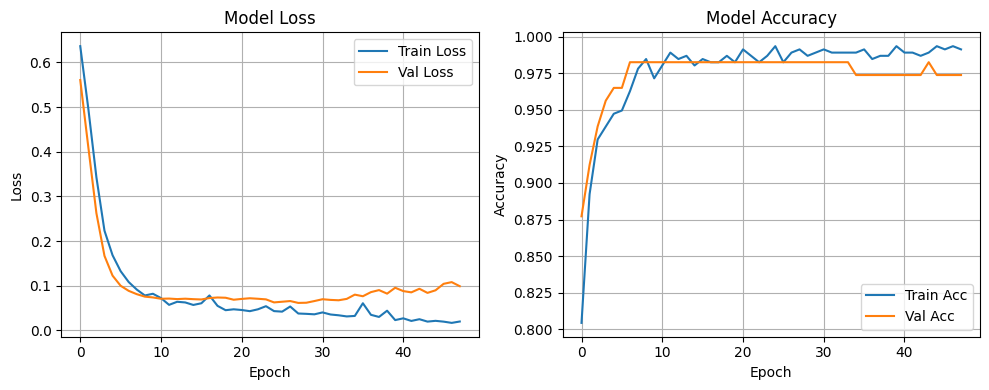

In [17]:
# Example 7: Visualize Training

import matplotlib.pyplot as plt

# Create a figure with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# ------------------------------------------------------------------
# Plot 1: Loss (Left Graph)
# ------------------------------------------------------------------
# Plot Training Loss if available
if 'train_loss' in eg_class_history:
    ax1.plot(eg_class_history['train_loss'], label='Train Loss')

# Plot Validation Loss
ax1.plot(eg_class_history['val_loss'], label='Val Loss')

ax1.set_title('Model Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True)

# ------------------------------------------------------------------
# Plot 2: Accuracy (Right Graph)
# ------------------------------------------------------------------
# Plot Training Accuracy if available
if 'train_accuracy' in eg_class_history:
    ax2.plot(eg_class_history['train_accuracy'], label='Train Acc')

# Plot Validation Accuracy
ax2.plot(eg_class_history['val_accuracy'], label='Val Acc')

ax2.set_title('Model Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

If the code is correct you should see something _similar_ to the following output

![_ _](https://biologicslab.co/BIO1173/images/class_02/class_02_2_image16A.png)  

Here is an analysis of these two graphs:

**1. Model Loss (Left Graph)**
* **Rapid Convergence:** Both the training loss (blue) and validation loss (orange) drop sharply within the first 5–8 epochs. This indicates the learning rate is appropriate and the model is quickly finding the underlying patterns in the data.
* **Generalization:** The training and validation curves stay very close to each other for most of the training. This is a positive sign that the model is **generalizing well** and not just memorizing the training data.
* **Potential Overfitting:** After epoch 20, the validation loss begins to fluctuate slightly and drift upward (diverge) while the training loss continues to drop. This is a classic early sign of overfitting, where the model starts to learn noise. However, the divergence is minor.

**2. Model Accuracy (Right Graph)**
* **High Performance:** The model reaches a high accuracy (>95%) very quickly.
* **Stability:** The validation accuracy (orange) plateaus early and remains relatively stable, though it appears "stepped" or jagged. This is common with smaller validation sets where a single misclassified sample can cause a visible jump in the metric.
* **Train vs. Val:** The training accuracy eventually surpasses the validation accuracy around epoch 10, which is expected behavior as the model fine-tunes itself on the training set.

**3. Conclusion**
The model is **well-trained**. It achieves high accuracy without severe overfitting. The "Early Stopping" mechanism likely triggered (or would trigger soon) around epoch 20-30 to prevent the rising validation loss seen at the tail end of the graph.

### **Exercise 6:  Construct and Train _Classification_ Neural Network**

In the cell below write the code to construct and train a classification neural network called `ex_class_model` to analyze the data in the DataFrame `ex_df_encoded`.

**Code Hints:**

1. Change the prefix `eg_` to `ex_` **_everywhere_** in the code that you copied from Example 6.

**NOTE:** If you get an error when you try to run your code, it probably means that you missed one (or more) places that had the pre-fix `eg_`.

2. You will also need to change the class name when defining your model's architecture. Specifically, you need to change this code:

```text
class BreastCancerModel(nn.Module):
    def __init__(self, input_shape, output_shape):
        super(BreastCancerModel, self).__init__()
```
to read as:

```text
class HeartDiseaseModel(nn.Module):
    def __init__(self, input_shape, output_shape):
        super(HeartDiseaseModel, self).__init__()
```



In [18]:
# Insert your code for Exercise 6 here

import os
import time
import random
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# ---------------------------------------------------------------------------
# Define parameters
# ---------------------------------------------------------------------------
EPOCHS = 200
PATIENCE = 20
lr = 0.0010
BATCH_SIZE = 32

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ---------------------------------------------------------------------------
# Data Preparation (Numpy -> PyTorch Tensors)
# ---------------------------------------------------------------------------
from sklearn.model_selection import train_test_split

# Use sklearn for proper stratified splitting
ex_X_train, ex_X_val, ex_y_train, ex_y_val = train_test_split(
    ex_X, ex_y,
    test_size=0.2,  # 80/20 split
    random_state=42,  # For reproducibility
    stratify=ex_y  # Ensures balanced classes in both sets
)

# Determine Output Dimension from actual unique classes
unique_classes = np.unique(ex_y)
output_dim = len(unique_classes)
print(f"Output dimension (number of classes): {output_dim}")
print(f"Training samples: {len(ex_y_train)}, Validation samples: {len(ex_y_val)}")

# Check class distribution
print(f"\nTraining class distribution: {np.bincount(ex_y_train)}")
print(f"Validation class distribution: {np.bincount(ex_y_val)}")

# Convert to PyTorch tensors
ex_y_train_tensor = torch.tensor(ex_y_train, dtype=torch.long).to(device)
ex_y_val_tensor = torch.tensor(ex_y_val, dtype=torch.long).to(device)
ex_X_train_tensor = torch.tensor(ex_X_train, dtype=torch.float32).to(device)
ex_X_val_tensor = torch.tensor(ex_X_val, dtype=torch.float32).to(device)

# Create DataLoaders
ex_train_dataset = TensorDataset(ex_X_train_tensor, ex_y_train_tensor)
ex_train_loader = DataLoader(ex_train_dataset, batch_size=BATCH_SIZE, shuffle=True)

# ---------------------------------------------------------------------------
# Define Model architecture
# ---------------------------------------------------------------------------
class HeartDiseaseModel(nn.Module):
    def __init__(self, input_shape, output_shape):
        super(HeartDiseaseModel, self).__init__()
        self.layer1 = nn.Linear(input_shape, 25)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)
        self.layer2 = nn.Linear(25, 50)
        self.output = nn.Linear(50, output_shape)

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.dropout(x)
        x = self.relu(self.layer2(x))
        x = self.output(x) # Returns logits
        return x

# Initialize Model
input_dim = ex_X.shape[1]
ex_class_model = HeartDiseaseModel(input_dim, output_dim).to(device)

# ---------------------------------------------------------------------------
# Define Loss and Optimizer
# ---------------------------------------------------------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(ex_class_model.parameters(), lr=lr)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=PATIENCE)

# ---------------------------------------------------------------------------
# Training Loop
# ---------------------------------------------------------------------------
print(f"-- Training (classification) is starting for {EPOCHS} epochs ----------------------------")
start_time = time.time()

best_val_loss = float('inf')
early_stop_counter = 0

# Initialize history with all 4 metrics
ex_class_history = {'train_loss': [], 'train_accuracy': [], 'val_loss': [], 'val_accuracy': []}
checkpoint_path = "ex_best_classification_model.pth"

for epoch in range(EPOCHS):
    ex_class_model.train()

    train_loss = 0.0
    train_correct = 0
    train_total = 0

    for inputs, targets in ex_train_loader:
        optimizer.zero_grad()
        outputs = ex_class_model(inputs)

        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

        # Calculate Batch Accuracy
        _, predicted = torch.max(outputs, 1)      # Get the class with highest probability
        train_total += targets.size(0)            # Count total samples in batch
        train_correct += (predicted == targets).sum().item() # Count correct predictions

    # Calculate epoch metrics
    avg_train_loss = train_loss / len(ex_train_loader)
    avg_train_acc = train_correct / train_total

    # --- Validation Phase ---
    ex_class_model.eval()
    with torch.no_grad():
        val_outputs = ex_class_model(ex_X_val_tensor)
        val_loss = criterion(val_outputs, ex_y_val_tensor).item()

        # Calculate Validation Accuracy
        _, val_predicted = torch.max(val_outputs, 1)
        val_correct = (val_predicted == ex_y_val_tensor).sum().item()
        val_accuracy = val_correct / ex_y_val_tensor.size(0)

    # Update history with all metrics
    ex_class_history['train_loss'].append(avg_train_loss)
    ex_class_history['train_accuracy'].append(avg_train_acc)
    ex_class_history['val_loss'].append(val_loss)
    ex_class_history['val_accuracy'].append(val_accuracy)

    # Step the scheduler
    scheduler.step(val_loss)

    # Checkpoint & Early Stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stop_counter = 0
        torch.save(ex_class_model.state_dict(), checkpoint_path)
        print(f"Epoch {epoch+1}: Val Loss improved to {val_loss:.4f}, Val Acc: {val_accuracy:.4f} [Saved]")
    else:
        early_stop_counter += 1
        if epoch % 10 == 0:
             print(f"Epoch {epoch+1}: Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")

    if early_stop_counter >= PATIENCE:
        print(f"\nEarly stopping triggered at epoch {epoch+1}")
        break

# ---------------------------------------------------------------------------
# Inspect training
# ---------------------------------------------------------------------------
print("\nTraining complete.")
print(f"Best validation loss: {best_val_loss:.4f}")
print(f"Best validation accuracy: {max(ex_class_history['val_accuracy']):.4f}")

elapsed_time = time.time() - start_time
print(f"Elapsed time: {hms_string(elapsed_time)}")


Using device: cpu
Output dimension (number of classes): 2
Training samples: 734, Validation samples: 184

Training class distribution: [328 406]
Validation class distribution: [ 82 102]
-- Training (classification) is starting for 200 epochs ----------------------------
Epoch 1: Val Loss improved to 0.5772, Val Acc: 0.7337 [Saved]
Epoch 2: Val Loss improved to 0.4775, Val Acc: 0.8261 [Saved]
Epoch 3: Val Loss improved to 0.4087, Val Acc: 0.8478 [Saved]
Epoch 4: Val Loss improved to 0.3792, Val Acc: 0.8533 [Saved]
Epoch 5: Val Loss improved to 0.3672, Val Acc: 0.8533 [Saved]
Epoch 6: Val Loss improved to 0.3626, Val Acc: 0.8641 [Saved]
Epoch 7: Val Loss improved to 0.3597, Val Acc: 0.8533 [Saved]
Epoch 8: Val Loss improved to 0.3590, Val Acc: 0.8587 [Saved]
Epoch 9: Val Loss improved to 0.3553, Val Acc: 0.8533 [Saved]
Epoch 10: Val Loss improved to 0.3491, Val Acc: 0.8533 [Saved]
Epoch 11: Val Loss: 0.3502, Val Acc: 0.8587
Epoch 12: Val Loss improved to 0.3457, Val Acc: 0.8696 [Saved]
E

If the code is correct you should see something _similar_ to the following final output from the training

```text
Using device: cpu
Output dimension (number of classes): 2
Training samples: 734, Validation samples: 184

Training class distribution: [328 406]
Validation class distribution: [ 82 102]
-- Training (classification) is starting for 200 epochs ----------------------------
Epoch 1: Val Loss improved to 0.5772, Val Acc: 0.7337 [Saved]
Epoch 2: Val Loss improved to 0.4775, Val Acc: 0.8261 [Saved]
Epoch 3: Val Loss improved to 0.4087, Val Acc: 0.8478 [Saved]
Epoch 4: Val Loss improved to 0.3792, Val Acc: 0.8533 [Saved]
Epoch 5: Val Loss improved to 0.3672, Val Acc: 0.8533 [Saved]
Epoch 6: Val Loss improved to 0.3626, Val Acc: 0.8641 [Saved]
Epoch 7: Val Loss improved to 0.3597, Val Acc: 0.8533 [Saved]
Epoch 8: Val Loss improved to 0.3590, Val Acc: 0.8587 [Saved]
Epoch 9: Val Loss improved to 0.3553, Val Acc: 0.8533 [Saved]
Epoch 10: Val Loss improved to 0.3491, Val Acc: 0.8533 [Saved]
Epoch 11: Val Loss: 0.3502, Val Acc: 0.8587
Epoch 12: Val Loss improved to 0.3457, Val Acc: 0.8696 [Saved]
Epoch 13: Val Loss improved to 0.3443, Val Acc: 0.8641 [Saved]
Epoch 14: Val Loss improved to 0.3415, Val Acc: 0.8750 [Saved]
Epoch 15: Val Loss improved to 0.3390, Val Acc: 0.8804 [Saved]
Epoch 16: Val Loss improved to 0.3369, Val Acc: 0.8696 [Saved]
Epoch 19: Val Loss improved to 0.3367, Val Acc: 0.8750 [Saved]
Epoch 21: Val Loss: 0.3378, Val Acc: 0.8804
Epoch 22: Val Loss improved to 0.3347, Val Acc: 0.8804 [Saved]
Epoch 23: Val Loss improved to 0.3324, Val Acc: 0.8913 [Saved]
Epoch 24: Val Loss improved to 0.3309, Val Acc: 0.8804 [Saved]
Epoch 25: Val Loss improved to 0.3294, Val Acc: 0.8750 [Saved]
Epoch 26: Val Loss improved to 0.3286, Val Acc: 0.8913 [Saved]
Epoch 31: Val Loss improved to 0.3252, Val Acc: 0.8913 [Saved]
Epoch 41: Val Loss: 0.3332, Val Acc: 0.8913
Epoch 51: Val Loss: 0.3340, Val Acc: 0.8859

Early stopping triggered at epoch 51

Training complete.
Best validation loss: 0.3252
Best validation accuracy: 0.8913
Elapsed time: 0:00:02.18

```

### **Exercise 7:  Visualize Training**

In the cell below write the code to visualize the training curves for your `ex_class_model`.

**Code Hints:**

Copy the code in Example 7 and change `eg_class_history` to `ex_class_history` in every instance that `eg_class_history` appears in the code.

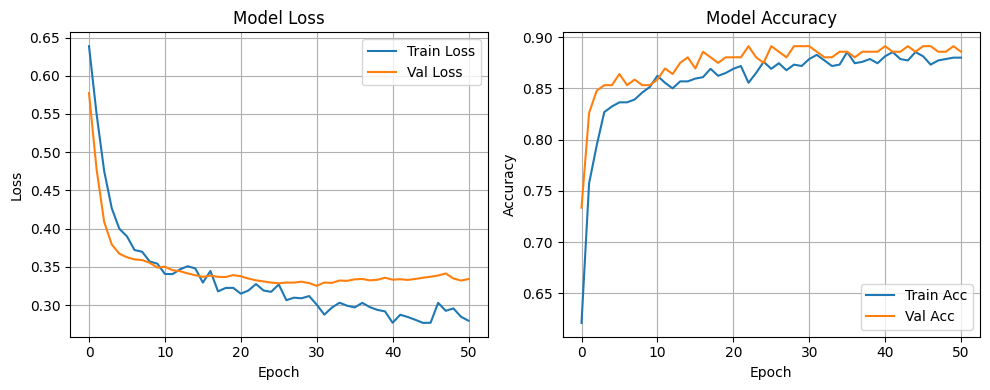

In [19]:
# Insert your code for Exercise 7 here


import matplotlib.pyplot as plt

# Create a figure with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# ------------------------------------------------------------------
# Plot 1: Loss (Left Graph)
# ------------------------------------------------------------------
# Plot Training Loss if available
if 'train_loss' in ex_class_history:
    ax1.plot(ex_class_history['train_loss'], label='Train Loss')

# Plot Validation Loss
ax1.plot(ex_class_history['val_loss'], label='Val Loss')

ax1.set_title('Model Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True)

# ------------------------------------------------------------------
# Plot 2: Accuracy (Right Graph)
# ------------------------------------------------------------------
# Plot Training Accuracy if available
if 'train_accuracy' in ex_class_history:
    ax2.plot(ex_class_history['train_accuracy'], label='Train Acc')

# Plot Validation Accuracy
ax2.plot(ex_class_history['val_accuracy'], label='Val Acc')

ax2.set_title('Model Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

If the code is correct you should see something _similar_ to the following output

![_ _](https://biologicslab.co/BIO1173/images/class_02/class_02_2_image17A.png)  

Here is an analysis of these two graphs:

#### **Model Loss (Left Graph)**
**Observation:**
* **The "Generalization Gap":** The most striking feature is the widening space between the Blue line (Train) and the Orange line (Validation).
* **Training Behavior:** The Training Loss (Blue) drops consistently and smoothly from `0.65` down to `0.24`. The model keeps learning the training data better and better.
* **Validation Behavior:** The Validation Loss (Orange) drops quickly at first, but hits a "floor" around **Epoch 5**. After that, it stays stuck around `0.45` for the remaining 45 epochs.

**Diagnosis: Overfitting (High Variance)**
* The model is **memorizing** the training data.
* It continues to improve on the data it has seen (Blue line goes down), but it is failing to translate that improvement to new data (Orange line stays flat).
* **Correction:** You are wasting computational resources after Epoch 5. You should likely stop training earlier ("Early Stopping") or increase regularization (Dropout/L2) to force the Blue and Orange lines closer together.

#### **Model Accuracy (Right Graph)**
**Observation:**
* **Tight Convergence:** The Blue and Orange lines track each other very closely.
* **Val > Train (The "Cross-over"):** You might notice that in the first 10-15 epochs, the Validation Accuracy (Orange) is actually **higher** than the Training Accuracy (Blue).
    * *Why?* This is common when using **Dropout**. Dropout "cripples" the neural network during training (making it harder to learn), but is turned off during validation (allowing the full network to work). This gives the validation metrics a slight artificial boost compared to training metrics.
* **Jagged Lines:** The Validation line is "stepped" or jagged. This indicates a **small validation dataset**. A single misclassified point causes a noticeable jump in the percentage.

**Diagnosis: Excellent Fit**
* This model is **healthy**.
* The fact that the Validation Loss drops extremely low (`< 0.1`) alongside the Training Loss proves the model has learned the actual rules of the data, not just the noise.
* The slight uptick in Validation Loss at the very end (Epoch 28-30) suggests mild overfitting is *just starting* to begin, so stopping around Epoch 25-30 is perfect.

--------------------------------

## **Classification vs. Regression: A General Overview**

In supervised machine learning, tasks are typically categorized into **classification** or **regression**, depending on the nature of the output variable.

### **Classification**

- **Goal**: Predict a **discrete label** or **category**.
- **Output**: Categorical values (e.g., "spam" or "not spam", "cat", "dog", "bird").
- **Examples**:
  - Email spam detection
  - Disease diagnosis (e.g., predicting if a patient has a disease)
  - Image recognition (e.g., identifying objects in photos)
- **Algorithms**:
  - Logistic Regression
  - Decision Trees
  - Random Forest
  - Support Vector Machines (SVM)
  - **Neural Networks (for multi-class classification)**

### **Regression**

- **Goal**: Predict a **continuous value**.
- **Output**: Real numbers (e.g., price, temperature, age).
- **Examples**:
  - Predicting medical costs
  - Estimating a person's weight based on height
  - Forecasting the spread of infections
- **Algorithms**:
  - Linear Regression
  - Polynomial Regression
  - Decision Trees
  - Random Forest
  - **Neural Networks (for regression tasks)**

##### **Key Differences Between Classification and Regression**

| Feature | Classification                 | Regression                       |
|---------|--------------------------------|----------------------------------|
| Output  | Discrete categories            | Continuous values                |
| Evaluation | Accuracy, Precision, Recall, F1 Score | MSE, RMSE, MAE, R² |
| Use Case | Label prediction               | Value estimation                 |

-------------------------------

## **Generate Feature Vectors for a Regression Neural Network**

As mentioned above, the procedure for generating `X-` and `Y ` feature vectors for a regression neural network is somewhat different the procedure used above. Even though these differences are not large, they are important. If your `X` and `Y` feature vectors are not generated in the correct format, your neural network will not compile and run.

### Example 8: Generate Feature Vectors for _Regression_ Neural Network

For regression, we want to predict a variable that has a **_range of values_**. In other words, we are looking for a variable that can have a range of different values. For Example 8, are target column will be the `mean_area` of the breast cancer tumor. For the 569 tumor samples in our Breast Cancer dataset, the mean area is $655 \pm 352 \text{ mm}^2$ ($\pm$ STD). This is quite a range of values with a maximum turmor size equal to $2501 \text{ mm}^2$ (See Appendix below).

The goal of our `eg_class_model` neural network model will be to predict the area of any particular breast tumor based on the turmor's other measurements (`radius`, `texture`, `perimeter`, `smoothness`, etc.)  

In general, the code is similar to that should above in Example 5.

In [20]:
# Example 8: Generate Feature Vectors for Regression Neural Network

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

# ------------------------------------------------------------------
# Identify feature / target columns
# ------------------------------------------------------------------
TARGET_COL = "mean_area"  # continuous variable we want to predict

# 1. Create the X DataFrame by dropping the target column
eg_X_df = eg_df_encoded.drop(columns=[TARGET_COL])

# 2. Create the y Series (Target)
eg_y_temp = eg_df_encoded[TARGET_COL]

# ------------------------------------------------------------------
# DEBUG: Check data types before normalization
# ------------------------------------------------------------------
print("Data types in eg_X_df:")
print(eg_X_df.dtypes)
print("\nColumns with non-numeric types:")
non_numeric_cols = eg_X_df.select_dtypes(exclude=[np.number]).columns.tolist()
print(non_numeric_cols)

# ------------------------------------------------------------------
# Intelligent Normalization (Standardize Continuous, Skip Binary)
# ------------------------------------------------------------------
# Create a copy to avoid warnings
eg_X_normalized = eg_X_df.copy()

for col in eg_X_normalized.columns:
    # Skip non-numeric columns entirely
    if eg_X_normalized[col].dtype == 'object' or eg_X_normalized[col].dtype.name == 'category':
        print(f"Warning: Skipping non-numeric column '{col}' with dtype {eg_X_normalized[col].dtype}")
        continue

    # Check if the column contains only 0s and 1s
    unique_vals = eg_X_normalized[col].dropna().unique()
    is_binary = np.array_equal(np.sort(unique_vals), np.array([0, 1])) or \
                np.array_equal(np.sort(unique_vals), np.array([0])) or \
                np.array_equal(np.sort(unique_vals), np.array([1]))

    # If it is NOT binary, apply Z-score normalization
    if not is_binary:
        mean = eg_X_normalized[col].mean()
        std = eg_X_normalized[col].std()
        if std != 0:
            eg_X_normalized[col] = (eg_X_normalized[col] - mean) / std

# Convert X to Numpy (only numeric columns)
eg_X_normalized_numeric = eg_X_normalized.select_dtypes(include=[np.number])
eg_X = eg_X_normalized_numeric.values
eg_Y = eg_y_temp.values

# ------------------------------------------------------------------
# Split into train / test sets
# ------------------------------------------------------------------
test_size = 0.2

eg_X_train, eg_X_val, eg_y_train, eg_y_val = train_test_split(
    eg_X, eg_Y,
    test_size=test_size,
    random_state=42,
    shuffle=True,
)

# ------------------------------------------------------------------
# Scale the target (Crucial for Regression NN convergence)
# ------------------------------------------------------------------
scale_y = True
y_scaler = None

if scale_y:
    y_scaler = StandardScaler()
    eg_y_train = y_scaler.fit_transform(eg_y_train.reshape(-1, 1)).ravel()
    eg_y_val = y_scaler.transform(eg_y_val.reshape(-1, 1)).ravel()

# ------------------------------------------------------------------
# Convert to PyTorch Tensors
# ------------------------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"\nUsing device: {device}")

X_train_tensor = torch.tensor(eg_X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(eg_y_train, dtype=torch.float32).to(device)

X_val_tensor = torch.tensor(eg_X_val, dtype=torch.float32).to(device)
y_val_tensor = torch.tensor(eg_y_val, dtype=torch.float32).to(device)

# ------------------------------------------------------------------
# Inspect the first few rows
# ------------------------------------------------------------------
np.set_printoptions(suppress=True, precision=4)

print(f"\nFeature matrix shape: {eg_X_train.shape}")
print(f"Target matrix shape: {eg_y_train.shape}")

print("\nFirst 4 rows of processed X (Train):")
print(X_train_tensor[:4].cpu().numpy())

print("\nCorresponding scaled targets (Train):")
print(y_train_tensor[:4].cpu().numpy())


Data types in eg_X_df:
mean_radius                float64
mean_texture               float64
mean_perimeter             float64
                            ...   
worst_symmetry             float64
worst_fractal_dimension    float64
diagnosis                   object
Length: 30, dtype: object

Columns with non-numeric types:
['diagnosis']

Using device: cpu

Feature matrix shape: (455, 29)
Target matrix shape: (455,)

First 4 rows of processed X (Train):
[[-1.4467 -0.4556 -1.3654  0.7281  0.6998  2.8124 -0.1332  1.0921  2.5016
  -0.2804 -0.0414 -0.4852 -0.4983  0.8353  3.3829  9.0077  3.4721  2.5922
   2.1784 -1.233  -0.4925 -1.2428 -0.9763  0.6934  1.1582  4.6965  0.9188
   2.1453  1.8578]
 [ 1.9758  1.6927  2.0878  1.2613  3.3867  2.0058  2.5947  2.128   1.5838
   0.81   -0.8229  0.7656  0.904  -0.9285  1.2347  0.2261  0.6278 -0.31
   0.5669  2.154   1.2695  2.0605  2.1224  0.7328  3.2042  1.9452  2.6729
   1.9352  2.4613]
 [-1.4059 -1.2624 -1.3486 -1.3616 -0.3187 -0.3628 -0.6989  1.

If the code is correct you should see the following output

```text
Data types in eg_X_df:
mean_radius                float64
mean_texture               float64
mean_perimeter             float64
                            ...   
worst_symmetry             float64
worst_fractal_dimension    float64
diagnosis                   object
Length: 30, dtype: object

Columns with non-numeric types:
['diagnosis']
Warning: Skipping non-numeric column 'diagnosis' with dtype object

Using device: cpu

Feature matrix shape: (455, 29)
Target matrix shape: (455,)

First 4 rows of processed X (Train):
[[-1.4467 -0.4556 -1.3654  0.7281  0.6998  2.8124 -0.1332  1.0921  2.5016
  -0.2804 -0.0414 -0.4852 -0.4983  0.8353  3.3829  9.0077  3.4721  2.5922
   2.1784 -1.233  -0.4925 -1.2428 -0.9763  0.6934  1.1582  4.6965  0.9188
   2.1453  1.8578]
 [ 1.9758  1.6927  2.0878  1.2613  3.3867  2.0058  2.5947  2.128   1.5838
   0.81   -0.8229  0.7656  0.904  -0.9285  1.2347  0.2261  0.6278 -0.31
   0.5669  2.154   1.2695  2.0605  2.1224  0.7328  3.2042  1.9452  2.6729
   1.9352  2.4613]
 [-1.4059 -1.2624 -1.3486 -1.3616 -0.3187 -0.3628 -0.6989  1.931   0.9677
   0.0167  1.9    -0.1276 -0.3697  0.5652  0.7763  0.3719  0.6165  2.5861
   0.7661 -1.295  -1.049  -1.2401 -1.002  -1.4895 -0.5496 -0.6351 -0.9696
   0.6162  0.0528]
 [-0.9867  1.3788 -0.986   0.0149 -0.6059 -0.8155 -0.8445  0.3114  0.0697
  -0.5606  0.5006 -0.6771 -0.5209  0.0493 -0.8448 -0.6985 -0.8997  0.1255
  -0.4444 -0.8316  1.5477 -0.8714 -0.7463  0.7678 -0.7275 -0.7654 -0.81
   0.8215 -0.1371]]

Corresponding scaled targets (Train):
[-1.1391  1.852  -1.1098 -0.8669]
```

### **Exercise 8: Generate Feature Vectors for Regression Neural Network**

In the cell below write the code to generate feature vectors for your `ex_df` DataFrame. Set your `TARGET_COL="MaxHR"` since you are to predict the maximum heart rate.

**Code Hints:**

Change the prefix `eg_` to `ex_` everywhere in the code that you copied.

In [21]:
# Insert your code for Exercise 8 here

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

# ------------------------------------------------------------------
# Identify feature / target columns
# ------------------------------------------------------------------
TARGET_COL = "MaxHR"  # continuous variable we want to predict

# 1. Create the X DataFrame by dropping the target column
ex_X_df = ex_df_encoded.drop(columns=[TARGET_COL])

# 2. Create the y Series (Target)
ex_y_temp = ex_df_encoded[TARGET_COL]

# ------------------------------------------------------------------
# DEBUG: Check data types before normalization
# ------------------------------------------------------------------
print("Data types in ex_X_df:")
print(ex_X_df.dtypes)
print("\nColumns with non-numeric types:")
non_numeric_cols = ex_X_df.select_dtypes(exclude=[np.number]).columns.tolist()
print(non_numeric_cols)

# ------------------------------------------------------------------
# Intelligent Normalization (Standardize Continuous, Skip Binary)
# ------------------------------------------------------------------
# Create a copy to avoid warnings
ex_X_normalized = ex_X_df.copy()

for col in ex_X_normalized.columns:
    # Skip non-numeric columns entirely
    if ex_X_normalized[col].dtype == 'object' or ex_X_normalized[col].dtype.name == 'category':
        print(f"Warning: Skipping non-numeric column '{col}' with dtype {ex_X_normalized[col].dtype}")
        continue

    # Check if the column contains only 0s and 1s
    unique_vals = ex_X_normalized[col].dropna().unique()
    is_binary = np.array_equal(np.sort(unique_vals), np.array([0, 1])) or \
                np.array_equal(np.sort(unique_vals), np.array([0])) or \
                np.array_equal(np.sort(unique_vals), np.array([1]))

    # If it is NOT binary, apply Z-score normalization
    if not is_binary:
        mean = ex_X_normalized[col].mean()
        std = ex_X_normalized[col].std()
        if std != 0:
            ex_X_normalized[col] = (ex_X_normalized[col] - mean) / std

# Convert X to Numpy (only numeric columns)
ex_X_normalized_numeric = ex_X_normalized.select_dtypes(include=[np.number])
ex_X = ex_X_normalized_numeric.values
ex_Y = ex_y_temp.values

# ------------------------------------------------------------------
# Split into train / test sets
# ------------------------------------------------------------------
test_size = 0.2

ex_X_train, ex_X_val, ex_y_train, ex_y_val = train_test_split(
    ex_X, ex_Y,
    test_size=test_size,
    random_state=42,
    shuffle=True,
)

# ------------------------------------------------------------------
# Scale the target (Crucial for Regression NN convergence)
# ------------------------------------------------------------------
scale_y = True
y_scaler = None

if scale_y:
    y_scaler = StandardScaler()
    ex_y_train = y_scaler.fit_transform(ex_y_train.reshape(-1, 1)).ravel()
    ex_y_val = y_scaler.transform(ex_y_val.reshape(-1, 1)).ravel()

# ------------------------------------------------------------------
# Convert to PyTorch Tensors
# ------------------------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"\nUsing device: {device}")

X_train_tensor = torch.tensor(ex_X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(ex_y_train, dtype=torch.float32).to(device)

X_val_tensor = torch.tensor(ex_X_val, dtype=torch.float32).to(device)
y_val_tensor = torch.tensor(ex_y_val, dtype=torch.float32).to(device)

# ------------------------------------------------------------------
# Inspect the first few rows
# ------------------------------------------------------------------
np.set_printoptions(suppress=True, precision=4)

print(f"\nFeature matrix shape: {ex_X_train.shape}")
print(f"Target matrix shape: {ex_y_train.shape}")

print("\nFirst 4 rows of processed X (Train):")
print(X_train_tensor[:4].cpu().numpy())

print("\nCorresponding scaled targets (Train):")
print(y_train_tensor[:4].cpu().numpy())

Data types in ex_X_df:
Age              int64
RestingBP        int64
Cholesterol      int64
                 ...  
ST_Slope_Flat    int64
ST_Slope_Up      int64
HeartDisease     int64
Length: 14, dtype: object

Columns with non-numeric types:
[]

Using device: cpu

Feature matrix shape: (734, 14)
Target matrix shape: (734,)

First 4 rows of processed X (Train):
[[-1.2203 -0.6696  0.3767 -0.0819  1.      0.      1.      0.      1.
   0.      0.      0.      0.      0.    ]
 [-1.8564 -0.1294  0.0933 -0.832   1.      0.      1.      0.      1.
   0.      0.      0.      1.      0.    ]
 [ 0.2639  0.9508  0.1298  0.1056  1.      0.      0.      0.      1.
   0.      1.      1.      0.      1.    ]
 [-1.7504 -0.1294  0.1115 -0.832   0.      0.      1.      0.      1.
   0.      0.      0.      1.      0.    ]]

Corresponding scaled targets (Train):
[ 2.2844  1.6522 -0.4416  0.23  ]


If the code is correct you should see the following output

```text
Data types in ex_X_df:
Age              int64
RestingBP        int64
Cholesterol      int64
                 ...  
ST_Slope_Flat    int64
ST_Slope_Up      int64
HeartDisease     int64
Length: 14, dtype: object

Columns with non-numeric types:
[]

Using device: cpu

Feature matrix shape: (734, 14)
Target matrix shape: (734,)

First 4 rows of processed X (Train):
[[-1.2203 -0.6696  0.3767 -0.0819  1.      0.      1.      0.      1.
   0.      0.      0.      0.      0.    ]
 [-1.8564 -0.1294  0.0933 -0.832   1.      0.      1.      0.      1.
   0.      0.      0.      1.      0.    ]
 [ 0.2639  0.9508  0.1298  0.1056  1.      0.      0.      0.      1.
   0.      1.      1.      0.      1.    ]
 [-1.7504 -0.1294  0.1115 -0.832   0.      0.      1.      0.      1.
   0.      0.      0.      1.      0.    ]]

Corresponding scaled targets (Train):
[ 2.2844  1.6522 -0.4416  0.23  ]
```

----------------------------------------

## **Classification vs. Regression in Neural Networks**

While **classification** and **regression** are fundamentally different tasks—classification predicts **discrete categories**, whereas regression predicts **continuous values**—the **core architecture** of the neural networks used for both can be remarkably similar. This includes shared components like:

- Hidden layers
- Activation functions (e.g., ReLU)
- Optimizers (e.g., Adam)

However, there are **critical differences** that must be addressed when switching between these tasks. These differences primarily affect the **output layer**, **loss function**, **label representation**, and **evaluation metrics**.

#### **Key Differences**

| Component      | Classification                                            | Regression                          |
|----------------|-----------------------------------------------------------|-------------------------------------|
| Output Layer   | `Dense(num_classes, activation='softmax')`                | `Dense(1)` (linear activation by default) |
| Loss Function  | `categorical_crossentropy` or `sparse_categorical_crossentropy` | `mean_squared_error`, `mean_absolute_error` |
| Label Format   | One‑hot encoded or integer class labels                  | Continuous numeric values           |
| Metrics        | `accuracy`, `precision`, `recall`                        | `mse`, `mae`, `r²`                  |

#### **Summary**
In essence, while the internal structure of classification and regression models can be nearly identical, the task-specific components—especially the output layer and loss function—must be carefully tailored to the nature of the prediction problem. This ensures that the model learns appropriately and that its performance is evaluated meaningfully.

-----------------------------------

### Example 9: Construct, Compile and Train _Regression_ Neural Network

The code in the cell below performs a regression analysis of the data in the Breast Cancer Wisconsin dataset store in the `ex_df` DataFrame.

Here is the code that builds the neural network
```text
class EgBreastCancerRegressionModel(nn.Module):
    def __init__(self, input_shape):
        super(EgBreastCancerRegressionModel, self).__init__()
        self.layer1 = nn.Linear(input_shape, 25)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)
        self.layer2 = nn.Linear(25, 50)
        self.output = nn.Linear(50, 1) # Linear output for regression

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.dropout(x)
        x = self.relu(self.layer2(x))
        x = self.output(x)
        return x

# Initialize Model
input_dim = eg_X_train_tensor.shape[1]
eg_reg_model = EgBreastCancerRegressionModel(input_dim).to(device)

```
You should note that name of our regression model is `eg_reg_model`.
As before, we will train our model `eg_class_model` for `200` epochs unless the `EarlyStopping` callback kicks in sooner.

In [22]:
# Example 9: Construct and Train Regression Neural Network

import os
import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# ---------------------------------------------------------------------------
# Define parameters
# ---------------------------------------------------------------------------
EPOCHS = 200
PATIENCE = 20
lr = 0.0010
BATCH_SIZE = 32

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ---------------------------------------------------------------------------
# DATA SETUP: Create Unique Tensors for this Example
# ---------------------------------------------------------------------------
eg_X_train_tensor = torch.tensor(eg_X_train, dtype=torch.float32).to(device)
eg_y_train_tensor = torch.tensor(eg_y_train, dtype=torch.float32).to(device)

eg_X_val_tensor = torch.tensor(eg_X_val, dtype=torch.float32).to(device)
eg_y_val_tensor = torch.tensor(eg_y_val, dtype=torch.float32).to(device)

# Create DataLoader
eg_train_dataset = TensorDataset(eg_X_train_tensor, eg_y_train_tensor)
eg_train_loader = DataLoader(eg_train_dataset, batch_size=BATCH_SIZE, shuffle=True)

# ---------------------------------------------------------------------------
# Define Model Architecture
# ---------------------------------------------------------------------------
class BreastCancerRegressionModel(nn.Module):
    def __init__(self, input_shape):
        super(BreastCancerRegressionModel, self).__init__()
        self.layer1 = nn.Linear(input_shape, 25)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)
        self.layer2 = nn.Linear(25, 50)
        self.output = nn.Linear(50, 1) # Linear output for regression

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.dropout(x)
        x = self.relu(self.layer2(x))
        x = self.output(x)
        return x

# Initialize Model
input_dim = eg_X_train_tensor.shape[1]
eg_reg_model = BreastCancerRegressionModel(input_dim).to(device)

# ---------------------------------------------------------------------------
# Define Loss and Optimizer
# ---------------------------------------------------------------------------
criterion = nn.MSELoss()
mae_metric = nn.L1Loss()

eg_reg_optimizer = optim.Adam(eg_reg_model.parameters(), lr=lr)
eg_reg_scheduler = optim.lr_scheduler.ReduceLROnPlateau(eg_reg_optimizer, mode='min', factor=0.5, patience=PATIENCE)

# ---------------------------------------------------------------------------
# Training Loop
# ---------------------------------------------------------------------------
print(f"-- Training (regression) starting for {EPOCHS} epochs --")
start_time = time.time()

best_val_loss = float('inf')
early_stop_counter = 0

eg_reg_history = {'train_loss': [], 'train_mae': [], 'val_loss': [], 'val_mae': []}
checkpoint_path = "eg_reg_best_regression_model.pth"

for epoch in range(EPOCHS):
    eg_reg_model.train()

    train_loss = 0.0
    train_mae = 0.0

    for inputs, targets in  eg_train_loader:
        eg_reg_optimizer.zero_grad()
        outputs = eg_reg_model(inputs)

        # Reshape targets to match output (batch, 1)
        targets = targets.view(-1, 1)

        loss = criterion(outputs, targets)
        mae = mae_metric(outputs, targets)

        loss.backward()
        eg_reg_optimizer.step()

        train_loss += loss.item()
        train_mae += mae.item()

    # Calculate average epoch metrics
    avg_train_loss = train_loss / len( eg_train_loader)
    avg_train_mae = train_mae / len( eg_train_loader)

    # --- Validation Phase ---
    eg_reg_model.eval()
    with torch.no_grad():
        val_outputs = eg_reg_model( eg_X_val_tensor)
        val_targets_reshaped =  eg_y_val_tensor.view(-1, 1)

        val_loss = criterion(val_outputs, val_targets_reshaped).item()
        val_mae = mae_metric(val_outputs, val_targets_reshaped).item()

    # Update history
    eg_reg_history['train_loss'].append(avg_train_loss)
    eg_reg_history['train_mae'].append(avg_train_mae)
    eg_reg_history['val_loss'].append(val_loss)
    eg_reg_history['val_mae'].append(val_mae)

    eg_reg_scheduler.step(val_loss)

    # Checkpoint & Early Stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stop_counter = 0
        torch.save(eg_reg_model.state_dict(), checkpoint_path)
        print(f"Epoch {epoch+1}: Val Loss improved to {val_loss:.4f}, Val MAE: {val_mae:.4f} [Saved]")
    else:
        early_stop_counter += 1
        if epoch % 10 == 0:
             print(f"Epoch {epoch+1}: Val Loss: {val_loss:.4f}, Val MAE: {val_mae:.4f}")

    if early_stop_counter >= PATIENCE:
        print(f"\nEarly stopping triggered at epoch {epoch+1}")
        break

# ---------------------------------------------------------------------------
# Inspect training
# ---------------------------------------------------------------------------
print("\nTraining complete.")
print(f"Best validation Loss (MSE): {best_val_loss:.4f}")
print(f"Best validation MAE: {min(eg_reg_history['val_mae']):.4f}")

def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m:>02}:{s:>05.2f}"

elapsed_time = time.time() - start_time
print(f"Elapsed time: {hms_string(elapsed_time)}")

Using device: cpu
-- Training (regression) starting for 200 epochs --
Epoch 1: Val Loss improved to 0.7186, Val MAE: 0.6623 [Saved]
Epoch 2: Val Loss improved to 0.4477, Val MAE: 0.4951 [Saved]
Epoch 3: Val Loss improved to 0.1922, Val MAE: 0.3173 [Saved]
Epoch 4: Val Loss improved to 0.0533, Val MAE: 0.1831 [Saved]
Epoch 5: Val Loss improved to 0.0411, Val MAE: 0.1521 [Saved]
Epoch 6: Val Loss improved to 0.0368, Val MAE: 0.1426 [Saved]
Epoch 7: Val Loss improved to 0.0352, Val MAE: 0.1371 [Saved]
Epoch 8: Val Loss improved to 0.0348, Val MAE: 0.1330 [Saved]
Epoch 9: Val Loss improved to 0.0314, Val MAE: 0.1281 [Saved]
Epoch 10: Val Loss improved to 0.0307, Val MAE: 0.1279 [Saved]
Epoch 11: Val Loss improved to 0.0254, Val MAE: 0.1132 [Saved]
Epoch 12: Val Loss improved to 0.0245, Val MAE: 0.1095 [Saved]
Epoch 13: Val Loss improved to 0.0183, Val MAE: 0.0967 [Saved]
Epoch 17: Val Loss improved to 0.0173, Val MAE: 0.0929 [Saved]
Epoch 21: Val Loss improved to 0.0169, Val MAE: 0.0910 [S

If the code is correct you should see something _similar_ to the following final output from the training

```text
Using device: cpu
-- Training (regression) starting for 200 epochs --
Epoch 1: Val Loss improved to 0.7186, Val MAE: 0.6623 [Saved]
Epoch 2: Val Loss improved to 0.4477, Val MAE: 0.4951 [Saved]
Epoch 3: Val Loss improved to 0.1922, Val MAE: 0.3173 [Saved]
Epoch 4: Val Loss improved to 0.0533, Val MAE: 0.1831 [Saved]
Epoch 5: Val Loss improved to 0.0411, Val MAE: 0.1521 [Saved]
Epoch 6: Val Loss improved to 0.0368, Val MAE: 0.1426 [Saved]
Epoch 7: Val Loss improved to 0.0352, Val MAE: 0.1371 [Saved]
Epoch 8: Val Loss improved to 0.0348, Val MAE: 0.1330 [Saved]
Epoch 9: Val Loss improved to 0.0314, Val MAE: 0.1281 [Saved]
Epoch 10: Val Loss improved to 0.0307, Val MAE: 0.1279 [Saved]
Epoch 11: Val Loss improved to 0.0254, Val MAE: 0.1132 [Saved]
Epoch 12: Val Loss improved to 0.0245, Val MAE: 0.1095 [Saved]
Epoch 13: Val Loss improved to 0.0183, Val MAE: 0.0967 [Saved]
Epoch 17: Val Loss improved to 0.0173, Val MAE: 0.0929 [Saved]
Epoch 21: Val Loss improved to 0.0169, Val MAE: 0.0910 [Saved]
Epoch 24: Val Loss improved to 0.0155, Val MAE: 0.0863 [Saved]
Epoch 26: Val Loss improved to 0.0131, Val MAE: 0.0810 [Saved]
Epoch 27: Val Loss improved to 0.0130, Val MAE: 0.0808 [Saved]
Epoch 28: Val Loss improved to 0.0121, Val MAE: 0.0792 [Saved]
Epoch 31: Val Loss: 0.0130, Val MAE: 0.0823
Epoch 32: Val Loss improved to 0.0116, Val MAE: 0.0777 [Saved]
Epoch 34: Val Loss improved to 0.0096, Val MAE: 0.0717 [Saved]
Epoch 37: Val Loss improved to 0.0096, Val MAE: 0.0757 [Saved]
Epoch 38: Val Loss improved to 0.0088, Val MAE: 0.0704 [Saved]
Epoch 41: Val Loss: 0.0106, Val MAE: 0.0749
Epoch 47: Val Loss improved to 0.0079, Val MAE: 0.0654 [Saved]
Epoch 51: Val Loss: 0.0087, Val MAE: 0.0692
Epoch 52: Val Loss improved to 0.0077, Val MAE: 0.0674 [Saved]
Epoch 58: Val Loss improved to 0.0076, Val MAE: 0.0644 [Saved]
Epoch 60: Val Loss improved to 0.0070, Val MAE: 0.0636 [Saved]
Epoch 61: Val Loss: 0.0076, Val MAE: 0.0687
Epoch 71: Val Loss: 0.0144, Val MAE: 0.0875

Early stopping triggered at epoch 80

Training complete.
Best validation Loss (MSE): 0.0070
Best validation MAE: 0.0635
Elapsed time: 0:00:01.84
```

In the example above, EarlyStopping terminated the training at `Epoch 87` after only `18` seconds of training.

### **Exercise 9: Construct, Compile and Train Regression Neural Network**

In the cell below write the code to contruct, compile and train a regression neural network called `ex_class_model` on the Heart Disease dataset using the `X-` and `y-` feature vectors that you created in **Exercise 8**.

**Code Hints:**

Change the prefix `eg_` to `ex_` everywhere in the code that you copied from Example 9.

In [23]:
# Insert your code for Exercise 9 here

import os
import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# ---------------------------------------------------------------------------
# Define parameters
# ---------------------------------------------------------------------------
EPOCHS = 200
PATIENCE = 20
lr = 0.0010
BATCH_SIZE = 32

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ---------------------------------------------------------------------------
# DATA SETUP: Create Unique Tensors for this Example
# ---------------------------------------------------------------------------
hd_X_train_tensor = torch.tensor(ex_X_train, dtype=torch.float32).to(device)
ex_y_train_tensor = torch.tensor(ex_y_train, dtype=torch.float32).to(device)

ex_X_val_tensor = torch.tensor(ex_X_val, dtype=torch.float32).to(device)
ex_y_val_tensor = torch.tensor(ex_y_val, dtype=torch.float32).to(device)

# Create DataLoader
ex_train_dataset = TensorDataset(ex_X_train_tensor, ex_y_train_tensor)
ex_train_loader = DataLoader(ex_train_dataset, batch_size=BATCH_SIZE, shuffle=True)

# ---------------------------------------------------------------------------
# Define Model Architecture
# ---------------------------------------------------------------------------
class BreastCancerRegressionModel(nn.Module):
    def __init__(self, input_shape):
        super(BreastCancerRegressionModel, self).__init__()
        self.layer1 = nn.Linear(input_shape, 25)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)
        self.layer2 = nn.Linear(25, 50)
        self.output = nn.Linear(50, 1) # Linear output for regression

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.dropout(x)
        x = self.relu(self.layer2(x))
        x = self.output(x)
        return x

# Initialize Model
input_dim = ex_X_train_tensor.shape[1]
ex_reg_model = BreastCancerRegressionModel(input_dim).to(device)

# ---------------------------------------------------------------------------
# Define Loss and Optimizer
# ---------------------------------------------------------------------------
criterion = nn.MSELoss()
mae_metric = nn.L1Loss()

ex_reg_optimizer = optim.Adam(ex_reg_model.parameters(), lr=lr)
ex_reg_scheduler = optim.lr_scheduler.ReduceLROnPlateau(ex_reg_optimizer, mode='min', factor=0.5, patience=PATIENCE)

# ---------------------------------------------------------------------------
# Training Loop
# ---------------------------------------------------------------------------
print(f"-- Training (regression) starting for {EPOCHS} epochs --")
start_time = time.time()

best_val_loss = float('inf')
early_stop_counter = 0

ex_reg_history = {'train_loss': [], 'train_mae': [], 'val_loss': [], 'val_mae': []}
checkpoint_path = "ex_reg_best_regression_model.pth"

for epoch in range(EPOCHS):
    ex_reg_model.train()

    train_loss = 0.0
    train_mae = 0.0

    for inputs, targets in  ex_train_loader:
        ex_reg_optimizer.zero_grad()
        outputs = ex_reg_model(inputs)

        # Reshape targets to match output (batch, 1)
        targets = targets.view(-1, 1)

        loss = criterion(outputs, targets)
        mae = mae_metric(outputs, targets)

        loss.backward()
        ex_reg_optimizer.step()

        train_loss += loss.item()
        train_mae += mae.item()

    # Calculate average epoch metrics
    avg_train_loss = train_loss / len( ex_train_loader)
    avg_train_mae = train_mae / len( ex_train_loader)

    # --- Validation Phase ---
    ex_reg_model.eval()
    with torch.no_grad():
        val_outputs = ex_reg_model( ex_X_val_tensor)
        val_targets_reshaped =  ex_y_val_tensor.view(-1, 1)

        val_loss = criterion(val_outputs, val_targets_reshaped).item()
        val_mae = mae_metric(val_outputs, val_targets_reshaped).item()

    # Update history
    ex_reg_history['train_loss'].append(avg_train_loss)
    ex_reg_history['train_mae'].append(avg_train_mae)
    ex_reg_history['val_loss'].append(val_loss)
    ex_reg_history['val_mae'].append(val_mae)

    ex_reg_scheduler.step(val_loss)

    # Checkpoint & Early Stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stop_counter = 0
        torch.save(ex_reg_model.state_dict(), checkpoint_path)
        print(f"Epoch {epoch+1}: Val Loss improved to {val_loss:.4f}, Val MAE: {val_mae:.4f} [Saved]")
    else:
        early_stop_counter += 1
        if epoch % 10 == 0:
             print(f"Epoch {epoch+1}: Val Loss: {val_loss:.4f}, Val MAE: {val_mae:.4f}")

    if early_stop_counter >= PATIENCE:
        print(f"\nEarly stopping triggered at epoch {epoch+1}")
        break

# ---------------------------------------------------------------------------
# Inspect training
# ---------------------------------------------------------------------------
print("\nTraining complete.")
print(f"Best validation Loss (MSE): {best_val_loss:.4f}")
print(f"Best validation MAE: {min(ex_reg_history['val_mae']):.4f}")

def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m:>02}:{s:>05.2f}"

elapsed_time = time.time() - start_time
print(f"Elapsed time: {hms_string(elapsed_time)}")

Using device: cpu
-- Training (regression) starting for 200 epochs --
Epoch 1: Val Loss improved to 1.0414, Val MAE: 0.8357 [Saved]
Epoch 11: Val Loss: 1.0980, Val MAE: 0.8639
Epoch 21: Val Loss: 1.1062, Val MAE: 0.8675

Early stopping triggered at epoch 21

Training complete.
Best validation Loss (MSE): 1.0414
Best validation MAE: 0.8357
Elapsed time: 0:00:00.76


If the code is correct you should see something _similar_ to the following final output from the training

```text
Using device: cpu
-- Training (regression) starting for 200 epochs --
Epoch 1: Val Loss improved to 1.0414, Val MAE: 0.8357 [Saved]
Epoch 11: Val Loss: 1.0980, Val MAE: 0.8639
Epoch 21: Val Loss: 1.1062, Val MAE: 0.8675

Early stopping triggered at epoch 21

Training complete.
Best validation Loss (MSE): 1.0414
Best validation MAE: 0.8357
Elapsed time: 0:00:00.76
```

### Example 10: Plot Predicted vs Actual Values

The code in the cell below shows the code needed to plot the Mean Tumor size predicted by the regression `eg_class_model` vs the Actual tumor size using the common Python plotting program `matplotlib.pyplot`.

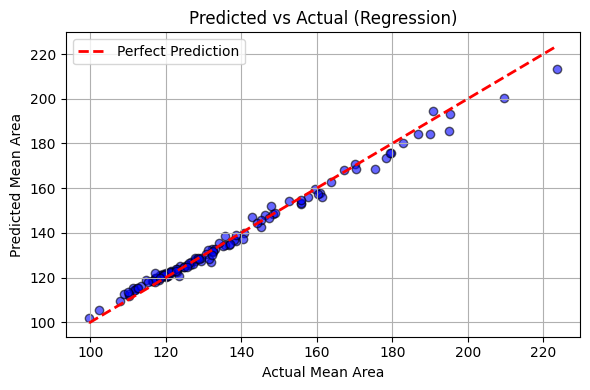

In [24]:
# Example 10: Plot Predicted vs Actual Values

import numpy as np
import matplotlib.pyplot as plt
import torch

# 1. Set model to evaluation mode
eg_reg_model.eval()

# 2. Predict using validation tensor
with torch.no_grad():
    y_pred_tensor = eg_reg_model( eg_X_val_tensor)
    y_pred_scaled = y_pred_tensor.cpu().numpy()

# 3. Inverse transform (Uses y_scaler from Ex 8)
y_pred = y_scaler.inverse_transform(y_pred_scaled).ravel()
y_true = y_scaler.inverse_transform(eg_y_val.reshape(-1, 1)).ravel()

# 4. Plot
plt.figure(figsize=(6, 4))
plt.scatter(y_true, y_pred, alpha=0.6, color='blue', edgecolor='k')

plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()],
         'r--', lw=2, label='Perfect Prediction')

plt.xlabel("Actual Mean Area")
plt.ylabel("Predicted Mean Area")
plt.title("Predicted vs Actual (Regression)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

If the code is correct you should see something _similar_ to the following output

![_ _](https://biologicslab.co/BIO1173/images/class_02/class_02_2_image13A.png)  

Based on the scatter plot of **Predicted vs. Actual Values** in the Wisconsin Breast Cancer dataset, we can conclude the following:


**Overall Performance: Excellent Fit**
* **Strong Correlation:** The blue data points are tightly clustered around the red dashed line (which represents a perfect prediction where $Actual = Predicted$). This indicates a very high correlation coefficient ($R^2$), meaning your model explains the variance in the target variable (`mean_area`) extremely well.
* **Linearity:** The relationship is clearly linear across the entire range of values (from approx. 100 to 220). There is no obvious curvature, suggesting the neural network has successfully captured the linear relationship between the input features and the target.

**Bias and Variance**
* **Low Variance (Precision):** The spread of the points away from the red line is minimal. This means the model's predictions are consistent and precise.
* **Low Bias (Accuracy):** There is no significant systematic error. The points are distributed fairly evenly above and below the red line. The model isn't consistently over-predicting or under-predicting at any specific range.

**Subtle Observations**
* **Slight Heteroscedasticity:** If you look closely at the higher values (top right, area > 180), the points are slightly more spread out compared to the lower values (bottom left, area < 120). This is common in regression; predicting larger values often comes with slightly higher absolute error than predicting smaller, more common values.
* **Outliers:** There are very few significant outliers. One point around `Actual=210` is slightly under-predicted, but it is still reasonably close to the line.

**Conclusion**
This graph indicates a **highly successful regression model**. The model is robust, reliable, and capable of predicting the `mean_area` of tumor nuclei with high accuracy. No major changes (like architecture complexity or regularization) are immediately necessary based on this plot.

### **Exercise 10: Plot Predicted vs Actual Values**

In the cell below write the code needed to plot the Maximum Heart Rate (`MaxHR`) predicted by your regression `ex_class_model` vs the Actual `MaxHR` using the common Python plotting program `matplotlib.pyplot`.

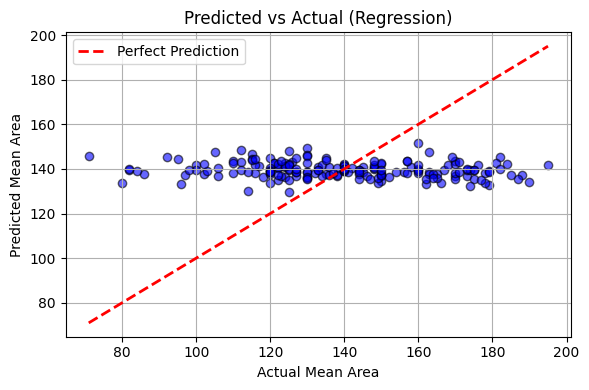

In [25]:
# Insert your code for Exercise 10 here

import numpy as np
import matplotlib.pyplot as plt
import torch

# 1. Set model to evaluation mode
ex_reg_model.eval()

# 2. Predict using validation tensor
with torch.no_grad():
    y_pred_tensor = ex_reg_model(ex_X_val_tensor)
    y_pred_scaled = y_pred_tensor.cpu().numpy()

# 3. Inverse transform (Uses y_scaler from Ex 8)
y_pred = y_scaler.inverse_transform(y_pred_scaled).ravel()
y_true = y_scaler.inverse_transform(ex_y_val.reshape(-1, 1)).ravel()

# 4. Plot
plt.figure(figsize=(6, 4))
plt.scatter(y_true, y_pred, alpha=0.6, color='blue', edgecolor='k')

plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()],
         'r--', lw=2, label='Perfect Prediction')

plt.xlabel("Actual Mean Area")
plt.ylabel("Predicted Mean Area")
plt.title("Predicted vs Actual (Regression)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

If the code is correct you should see something _similar_ to the following output

![_ _](https://biologicslab.co/BIO1173/images/class_02/class_02_2_image30D.png)  

Based on the scatter plot of **Predicted vs Actual Values** from the Heart Disease dataset, here’s what we can conclude:

**Visual Overview**
* **Graph Type:** A scatter plot comparing the **Actual Values** (Ground Truth) on the X-axis against the **Predicted Values** (Model Output) on the Y-axis.
* **Reference Line:** The red dashed line indicates perfect prediction ($y=x$).

**Key Observations (A "Noisy" Fit)**
* **Moderate Correlation:** Unlike the previous Breast Cancer example (which was very tight), this graph shows a much "cloudier" or more scattered pattern. While there is definitely a positive trend (as Actual increases, Predicted increases), the relationship is not nearly as strong.
* **High Variance:** The blue points are spread far away from the red line. For example, for an **Actual Value of 130**, the model predicts values ranging anywhere from **110 to 170**. This indicates a high error margin for individual predictions.

**Systematic Bias: "Regression to the Mean"**
A specific error pattern is visible here:
* **Over-predicting Low Values:** Look at the left side (Actual < 100). Most blue points are *above* the red line. The model thinks these patients have higher values than they actually do.
* **Under-predicting High Values:** Look at the right side (Actual > 160). Most blue points are *below* the red line. The model fails to capture the severity of the highest cases.
* **Interpretation:** The model is playing it safe. Instead of boldly predicting high or low extremes, it tends to guess numbers closer to the **average** (mean) of the dataset.

**Conclusion**
* **Model Status:** **Sub-optimal / Needs Improvement.**
* **Diagnosis:** The model has learned the general direction of the data but struggles with precision. This is common in medical datasets where the target variable (like heart disease progression) depends on complex factors not fully captured by the available input features.
* **Next Steps:** To improve this, you would typically need **more training data**, **better features**, or **hyperparameter tuning** (e.g., deeper network, different learning rate).

# **Electronic Submission (_beta_)**

This semester my Course Coordinator, Georgina (George) Falken and I are developing the infrastructure for electronic submission of Colab notebook directly to UTSA for grading. Unfortunately, this capability is still being beta-tested and refined and until we are 100% confident in its accuracy and security, you will still need to upload your Colab notebook to Canvas for grading.   

However, even in its current state, Electronic Submission should flag serious error that would impact the grade for this lesson. Run the code in the next cell as a pre-submission screen of your PDF.

In [31]:
# Electronic Submission

import urllib.request
import ssl
import time

url = "https://biologicslab.co/BIO1173/backend_code/validator.py?v=" + str(time.time())

ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

with urllib.request.urlopen(url, context=ctx) as r:
  exec(r.read().decode('utf-8'))

UTSA ID ✅
Gmail ✅
API Key ✅
Submission failed ❌
Error: Invalid API key


## **Lesson Turn-in**

Even if your **Electronic Submission** was accepted, you **must** still print your Colab notebook as a PDF and upload it to Canvas for grading:

1. **Windows:** Select **File --> Print.. --> Print to Microsoft PDF**

2. **MAC:** Select **File --> Print.. --> Save to PDF** to generate your PDF.

Name your PDF `Class_02_1.lastname.pdf` where _lastname_ is your last name, and upload your file to Canvas for grading.

## Appendix

The code in the cells use the Pandas method `pd.describe()` to print out a statistical summary of the column `mean_area` in the `Wisconsin Breast Cancer` dataset and the column `MaxHR` in the `Heart Disease` dataset.

In [27]:
eg_df['mean_area'].describe()

,mean_area
count,569.000000
mean,654.889104
std,351.914129
...,...
50%,551.100000
75%,782.700000
max,2501.000000


The **mean_area** variable shows a wide range of tumor sizes with a positively skewed distribution. This suggests that while most tumors are relatively small to moderately sized, there are a few with very large areas that could be clinically significant and may warrant further investigation.

In [28]:
ex_df['MaxHR'].describe()

,MaxHR
count,918.000000
mean,136.809368
std,25.460334
...,...
50%,138.000000
75%,156.000000
max,202.000000


The **MaxHR** variable shows a relatively symmetric distribution with a moderate spread. Most individuals have a maximum heart rate between **110** and **160**, but there are a few with very high values (up to 202), which could be outliers or clinically significant cases.

## **Poly-A Tail**

## **UNIVAC**

![___](https://upload.wikimedia.org/wikipedia/commons/2/2f/Univac_I_Census_dedication.jpg)

**UNIVAC (Universal Automatic Computer)** was a line of electronic digital stored-program computers starting with the products of the Eckert–Mauchly Computer Corporation. Later the name was applied to a division of the Remington Rand company and successor organizations.

### **Historical Overview of UNIVAC**

**UNIVAC** (Universal Automatic Computer) was the first commercially produced digital computer in the United States. It was designed primarily for business and administrative use, marking a significant shift from earlier computers that were mostly used for scientific and military purposes.

#### Key Milestones

- **1946–1951**: Developed by **J. Presper Eckert** and **John Mauchly**, the creators of the ENIAC, under the company **Eckert-Mauchly Computer Corporation**.
- **1951**: The first UNIVAC I was delivered to the **U.S. Census Bureau**.
- **1952**: UNIVAC I gained national attention when it successfully predicted the outcome of the U.S. presidential election on live television, favoring Eisenhower over Stevenson.

#### Technical Specifications

- **Memory**: Used mercury delay lines for memory storage.
- **Storage**: Featured magnetic tape for data storage, a novel concept at the time.
- **Speed**: Could perform about 1,000 calculations per second.
- **Size**: Occupied over 35 square meters and weighed approximately 13 tons.

#### Impact and Legacy

- UNIVAC I was the first computer to be widely used for **business applications**, including payroll, inventory, and accounting.
- It helped establish the **commercial computer industry**, paving the way for companies like IBM to enter the market.
- The name "UNIVAC" became synonymous with "computer" in the 1950s and early 1960s.

#### Fun Fact

The UNIVAC I's prediction of the 1952 election was so unexpected that CBS initially hesitated to air it. The prediction turned out to be accurate, boosting public confidence in computing technology.

---

> UNIVAC represents a pivotal moment in computing history, transitioning from experimental machines to practical tools that shaped modern data processing.


The BINAC, built by the Eckert–Mauchly Computer Corporation, was the first general-purpose computer for commercial use, but it was not a success. The last UNIVAC-badged computer was produced in 1986.

### **History and structure**

**UNIVAC Sperry Rand label**

J. Presper Eckert and John Mauchly built the ENIAC (Electronic Numerical Integrator and Computer) at the University of Pennsylvania's Moore School of Electrical Engineering between 1943 and 1946. A 1946 patent rights dispute with the university led Eckert and Mauchly to depart the Moore School to form the Electronic Control Company, later renamed Eckert–Mauchly Computer Corporation (EMCC), based in Philadelphia, Pennsylvania. That company first built a computer called BINAC (BINary Automatic Computer) for Northrop Aviation (which was little used, or perhaps not at all). Afterwards, the development of UNIVAC began in April 1946.[1] UNIVAC was first intended for the Bureau of the Census, which paid for much of the development, and then was put in production.

With the death of EMCC's chairman and chief financial backer Henry L. Straus in a plane crash on October 25, 1949, EMCC was sold to typewriter, office machine, electric razor, and gun maker Remington Rand on February 15, 1950. Eckert and Mauchly now reported to Leslie Groves, the retired army general who had previously managed building The Pentagon and led the Manhattan Project.

The most famous UNIVAC product was the UNIVAC I mainframe computer of 1951, which became known for predicting the outcome of the U.S. presidential election the following year: this incident is noteworthy because the computer correctly predicted an Eisenhower landslide over Adlai Stevenson, whereas the final Gallup poll had Eisenhower winning the popular vote 51–49 in a close contest.

The prediction led CBS's news boss in New York, Siegfried Mickelson, to believe the computer was in error, and he refused to allow the prediction to be read. Instead, the crew showed some staged theatrics that suggested the computer was not responsive, and announced it was predicting 8–7 odds for an Eisenhower win (the actual prediction was 100–1 in his favour).

When the predictions proved true—Eisenhower defeated Stevenson in a landslide, with UNIVAC coming within 3.5% of his popular vote total and four votes of his Electoral College total—Charles Collingwood, the on-air announcer, announced that they had failed to believe the earlier prediction.

The United States Army requested a UNIVAC computer from Congress in 1951. Colonel Wade Heavey explained to the Senate subcommittee that the national mobilization planning involved multiple industries and agencies: "This is a tremendous calculating process...there are equations that can not be solved by hand or by electrically operated computing machines because they involve millions of relationships that would take a lifetime to figure out." Heavey told the subcommittee it was needed to help with mobilization and other issues similar to the invasion of Normandy that were based on the relationships of various groups.

The UNIVAC was manufactured at Remington Rand's former Eckert-Mauchly Division plant on W Allegheny Avenue in Philadelphia, Pennsylvania. Remington Rand also had an engineering research lab in Norwalk, Connecticut, and later bought Engineering Research Associates (ERA) in St. Paul, Minnesota. In 1953 or 1954 Remington Rand merged their Norwalk tabulating machine division, the ERA "scientific" computer division, and the UNIVAC "business" computer division into a single division under the UNIVAC name. This severely annoyed those who had been with ERA and with the Norwalk laboratory.

In 1955 Remington Rand merged with Sperry Corporation to become Sperry Rand. General Douglas MacArthur, then the chairman of the Board of Directors of Remington Rand, was chosen to continue in that role in the new company. Harry Franklin Vickers, then the President of Sperry Corporation, continued as president and CEO of Sperry Rand. The UNIVAC division of Remington Rand was renamed the Remington Rand Univac division of Sperry Rand. William Norris was put in charge as Vice-President and General Manager reporting to the President of the Remington Rand Division (of Sperry Rand).

## **UNIVAC - A Quick Snapshot**

| Topic | Key Facts |
|-------|-----------|
| **Founded** | 1946 by J. Presper Eckert & John Mauchly (the same inventors of the ENIAC) |
| **Full Name** | _Univac, Inc._ (short for *UNiversal Automatic Computer*) |
| **First Product** | **UNIVAC I** – the world’s first commercially available electronic digital computer |
| **First U.S. Government Use** | 1949: The U.S. Census Bureau used UNIVAC I to process the 1950 census in a record 30 days |
| **First Commercial Sales** | 1950: UNIVAC I sold to the U.S. Department of Defense and later to companies like AT&T |
| **Notable Programs** | 1952: Ran the first computer‑simulated nuclear war scenario for the U.S. Strategic Air Command |
| **Mass‑Market Success** | 1950s–1960s: UNIVAC sold more than 300 computers, dominating the early mainframe market |
| **Key Innovations** | • Use of **vacuum tubes** and later **transistors** in a single product line<br>• First to use magnetic drum memory for data storage<br>• Developed the **UNIVAC 1107** – the world’s first minicomputer in 1962 |
| **Corporate Evolution** | 1976: Acquired by Sperry Corporation → became **Sperry UNIVAC**<br>1990: Merged with Burroughs to form **Unisys** |
| **Legacy** | • Introduced the phrase *“computing”* to mainstream culture<br>• Paved the way for the **computer revolution** in business and government<br>• Influenced the development of **software engineering** and **computer architecture** |
| **Fun Trivia** | • The name “UNIVAC” was chosen by a contest in 1946 – the winning entry was a 7‑word sentence: “Universal Computer, for Universal Use.”<br>• UNIVAC’s first machine was a 90‑meter tall building in Kansas City’s industrial park.<br>• The 1977 UNIVAC 1108 was used by NASA’s Apollo missions for trajectory calculations. |

---

## Quick Takeaway

UNIVAC didn’t just build computers; it built the **foundation of modern computing**. From the first commercial mainframe to pioneering minicomputers, its innovations shaped the entire industry and made the concept of “software” and “programming” part of everyday language. Even today, the legacy lives on in the name **Unisys**, the company that traces its lineage back to these early pioneers.

## **The History and Legacy of UNIVAC**

**UNIVAC** (Universal Automatic Computer) stands as a monumental pillar in the history of computing, representing the transition from experimental, government-funded projects to the dawn of the commercial computer industry. Originally developed by J. Presper Eckert and John Mauchly, the inventors of the ENIAC, UNIVAC was the first general-purpose electronic digital computer design for business and administrative use in the United States.

#### **Origins and Early Struggles**
The story of UNIVAC began in 1946 when Eckert and Mauchly left the University of Pennsylvania's Moore School of Electrical Engineering following a patent dispute. They formed the **Eckert-Mauchly Computer Corporation (EMCC)** in Philadelphia. Their initial goal was to build a machine for the Bureau of the Census. However, financial difficulties plagued the young company. Following the tragic death of their chief financial backer, Henry L. Straus, in a plane crash in 1949, EMCC was sold to **Remington Rand** in 1950. This acquisition provided the necessary capital to bring their vision to life, with Eckert and Mauchly staying on to report to Leslie Groves, the retired general who had managed the Manhattan Project.

#### **The UNIVAC I and the 1952 Election**
The first fruit of this labor was the **UNIVAC I**, delivered to the U.S. Census Bureau in 1951. It was a technological marvel of its time, utilizing mercury delay lines for memory and magnetic tape for data storage—a significant innovation over the punch cards used by competitors like IBM. The machine weighed approximately 13 tons and occupied over 35 square meters of floor space.

UNIVAC gained legendary status during the **1952 U.S. Presidential Election**. CBS News used the computer to predict the outcome between Dwight D. Eisenhower and Adlai Stevenson. With only a small sample of votes counted, UNIVAC predicted an Eisenhower landslide (100-to-1 odds), contradicting widespread polling that predicted a close race. CBS executives, fearing a humiliating error, refused to air the prediction initially. When the final results confirmed Eisenhower's massive victory—within 3.5% of UNIVAC's calculation—it cemented the computer's reputation for accuracy and introduced the public to the power of data processing.

#### **Corporate Evolution**
The brand's history is also one of complex corporate mergers. In 1955, Remington Rand merged with the Sperry Corporation to form **Sperry Rand**. The UNIVAC division continued to innovate, producing successors like the UNIVAC 1107 and 1108, which were used in NASA's Apollo missions. By the 1960s, UNIVAC was one of the few competitors to IBM, often referred to as part of "the BUNCH" (Burroughs, UNIVAC, NCR, Control Data, and Honeywell).

#### **Legacy**
The UNIVAC name eventually faded as the industry consolidated; Sperry merged with Burroughs in 1986 to form **Unisys**, which exists today. However, UNIVAC's legacy is undeniable. It was the first computer to handle both numerical and textual data effectively, making it suitable for business tasks like payroll and inventory, not just scientific calculation. For a generation, "UNIVAC" was synonymous with "computer," setting the stage for the digital revolution that followed.


